<span style="color:orchid">
<font size="6">BIRCH Clustering</font>
</span> 


In [1]:
import pickle
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd

<span style="color:orchid">
<font size="5">BIRCH Clustering with PCA</font>
</span> 


<span style="color:DodgerBlue">
<font size="4">Reading from files</font>
</span> 

In [2]:
import sys
import numpy as np
import pandas as pd
sys.path.insert(0, '../Libraries')
sys.path.insert(0, '../Datas/')

from Load_data import *

In [3]:
dataset='591'
df=loaddata(
            adr1=f'../Datas/X_{dataset}.pickle',
            adr2=f'../Datas/label_instrument_{dataset}.pickle',
            adr3=f'../Datas/label_dastgah_{dataset}.pickle')
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
feature_vectors=df.drop(["dastgah", "instrument"],axis=1)
labels=df["dastgah"]


labelencoder = LabelEncoder()
labelencoder.fit(labels)
y = labelencoder.transform(labels)

scaler = preprocessing.StandardScaler()
feature_vectors = scaler.fit_transform(feature_vectors)

In [4]:
from PCA import *
Pca=pca(feature_vectors)
feature_vectors=Pca.PCAout(10)

<span style="color:DodgerBlue">
<font size="4">Creating object</font>
</span> 


In [5]:
from Birch_model import *
Birch = Birch_Clustering(feature_vectors,y)

<span style="color:DodgerBlue">
<font size="4">Confusion Matrix</font>
</span> 

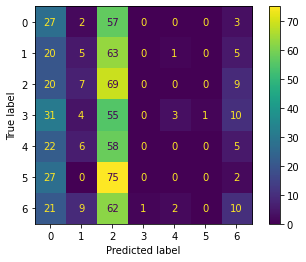

In [6]:
Birch.printConfusionMatrix()

<span style="color:DodgerBlue">
<font size="4">Elbow method to reach optimal K</font>
</span> 

In [7]:
# Birch.elbow(rangeOfClusters=20)

<span style="color:DodgerBlue">
<font size="4">Print metrics results with original data</font>
</span> 


In [8]:
clusters = [2, 4, 7, 20]
Birch.printDataMetrics(arr= clusters, fReduction=False)

Name                 Silhouette Score     chcalinski_harabasz_score davies_bouldin_score
#clusters=2          0.3674               80.1982              2.0647              
----------------------------------------------------------------------------------------------------
#clusters=4          0.3338               75.9711              1.0904              
----------------------------------------------------------------------------------------------------
#clusters=7          0.1233               70.1817              1.4686              
----------------------------------------------------------------------------------------------------
#clusters=20         0.073                59.3543              1.3205              
----------------------------------------------------------------------------------------------------




Name                 adjusted_rand_score  adjusted_mutual_info_score     normalized_mutual_info_score   homogeneity_score    completeness_score   v_measure_score      

<span style="color:DodgerBlue">
<font size="4">Print metrics results with reduced data</font>
</span> 


In [9]:
clusters = [2, 4, 7, 20]
Birch.printDataMetrics(arr= clusters, fReduction=True)

Name                 Silhouette Score     chcalinski_harabasz_score davies_bouldin_score
#clusters=2          0.38269999623298645  451.4834             0.8873              
----------------------------------------------------------------------------------------------------
#clusters=4          0.35760000348091125  560.0294             0.9633              
----------------------------------------------------------------------------------------------------
#clusters=7          0.3555999994277954   592.5773             0.8099              
----------------------------------------------------------------------------------------------------
#clusters=20         0.3691999912261963   731.8273             0.7834              
----------------------------------------------------------------------------------------------------




Name                 adjusted_rand_score  adjusted_mutual_info_score     normalized_mutual_info_score   homogeneity_score    completeness_score   v_measure_score      

<span style="color:DodgerBlue">
<font size="4">plot clusters from 1 to nClusters with original data </font>
</span> 


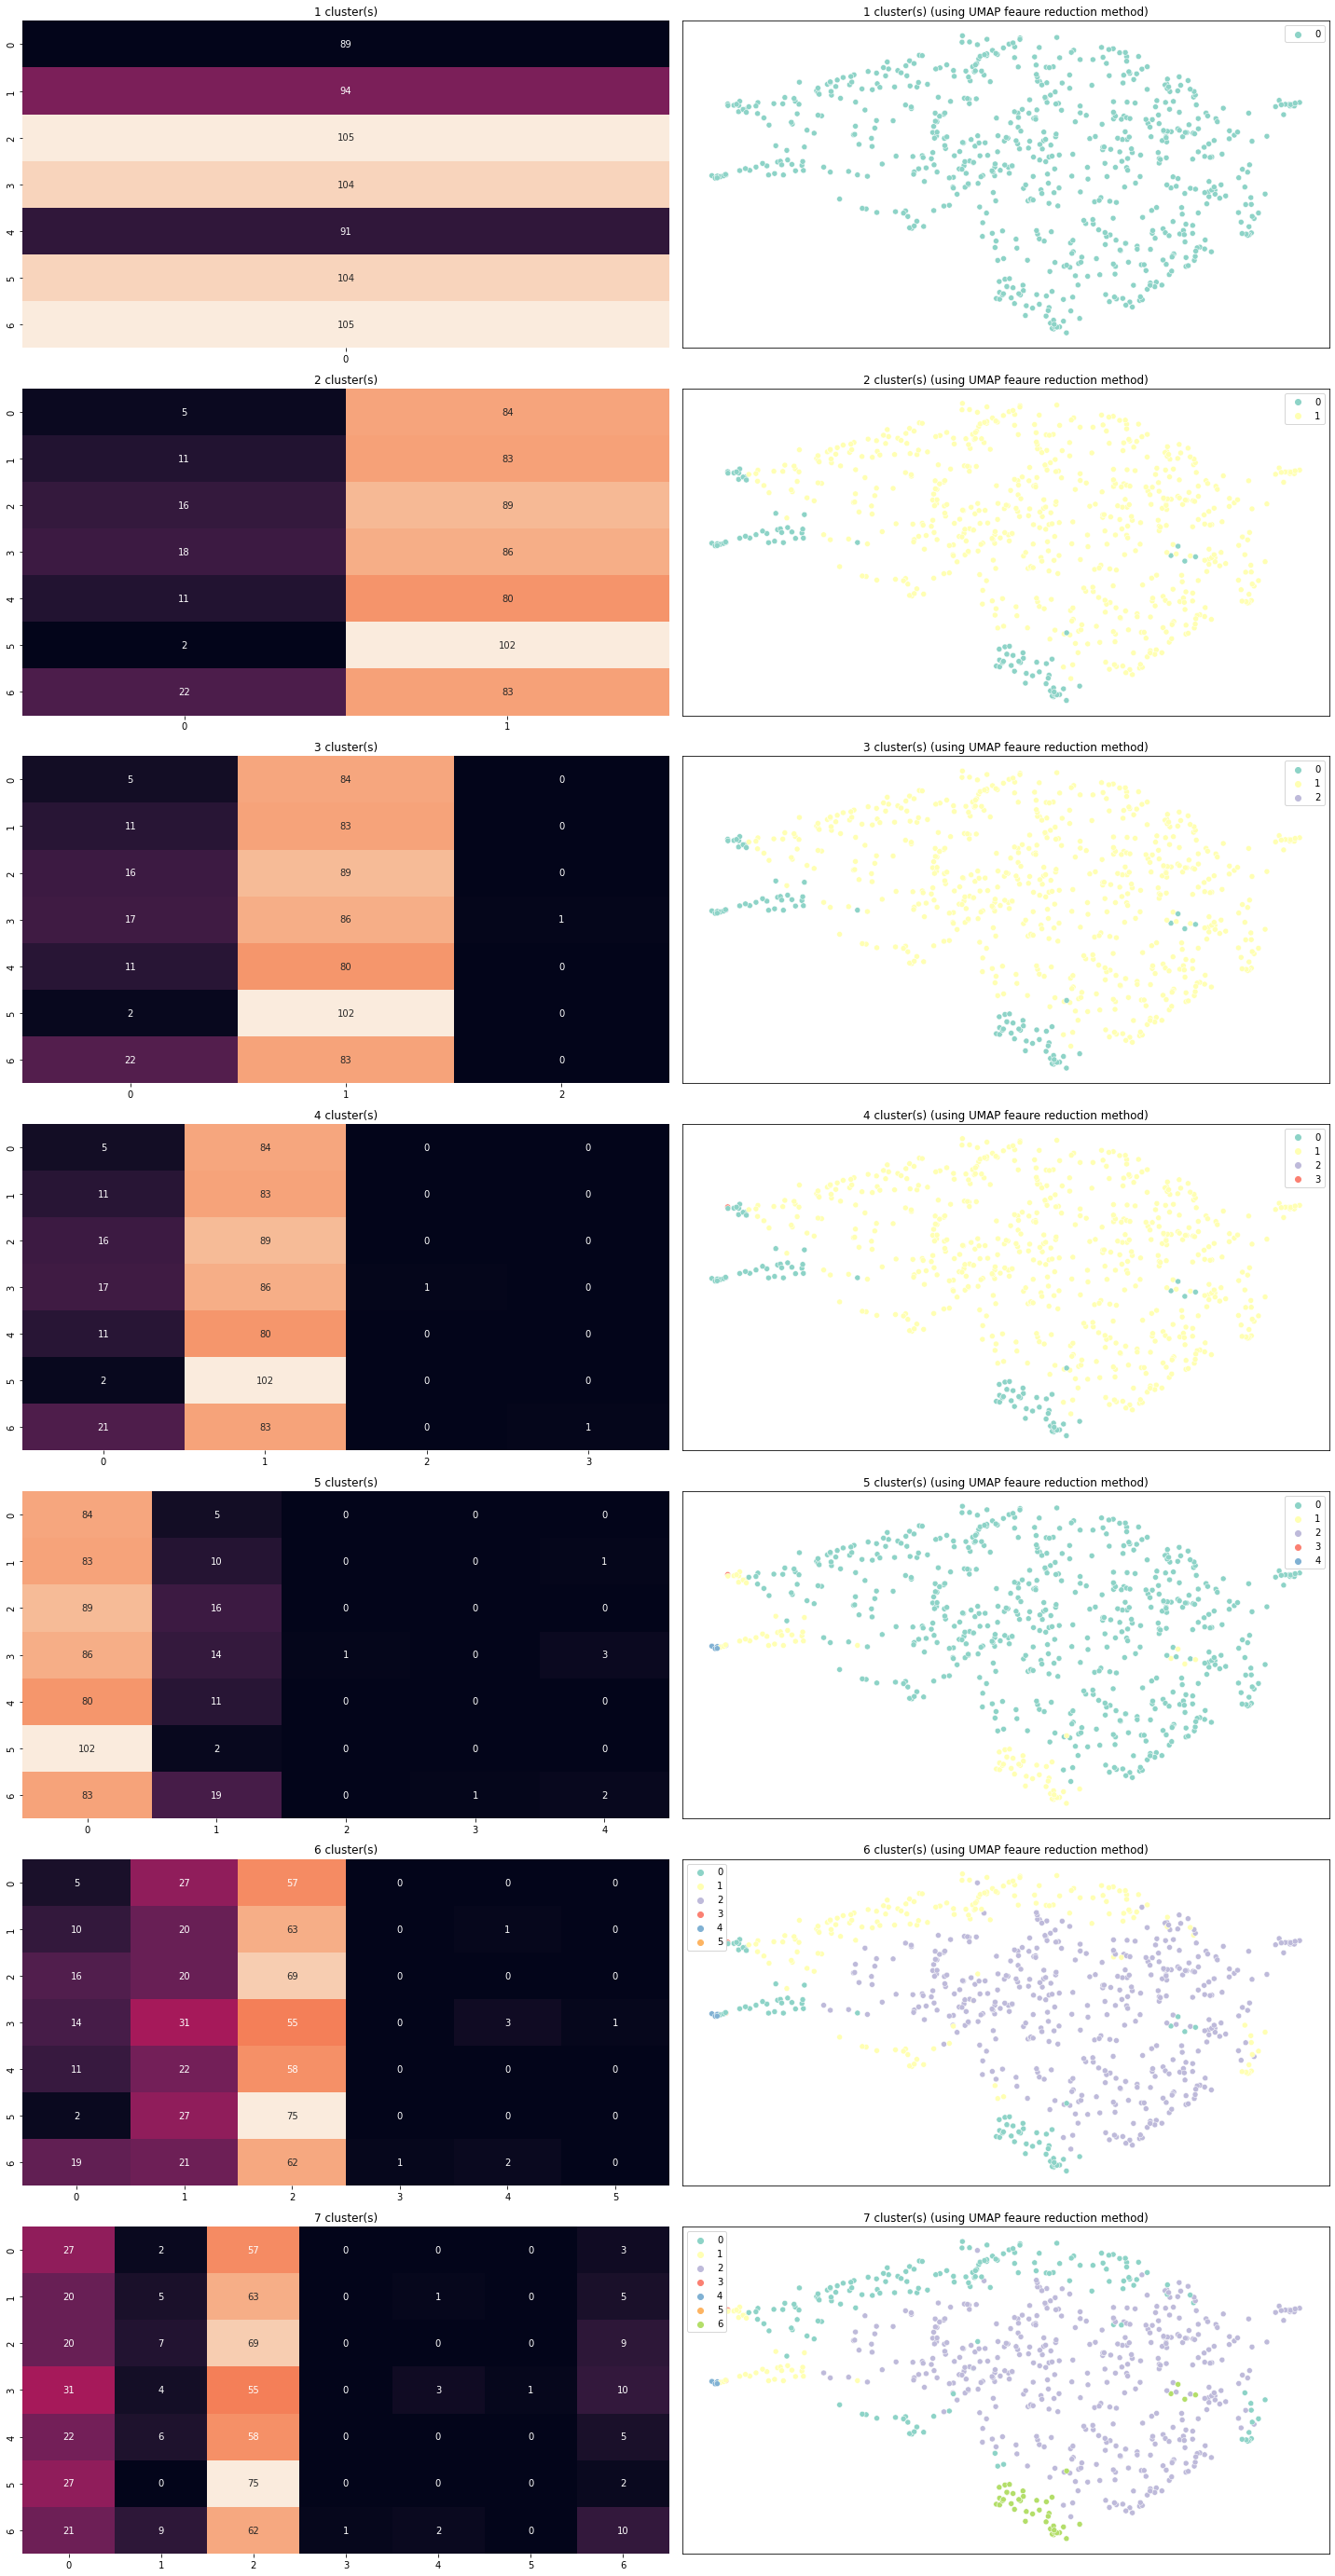

In [10]:
Birch.plotClusters(nClusters=7, fReduction=False)

<span style="color:DodgerBlue">
<font size="4">plot clusters from 1 to nClusters with reduced data </font>
</span> 


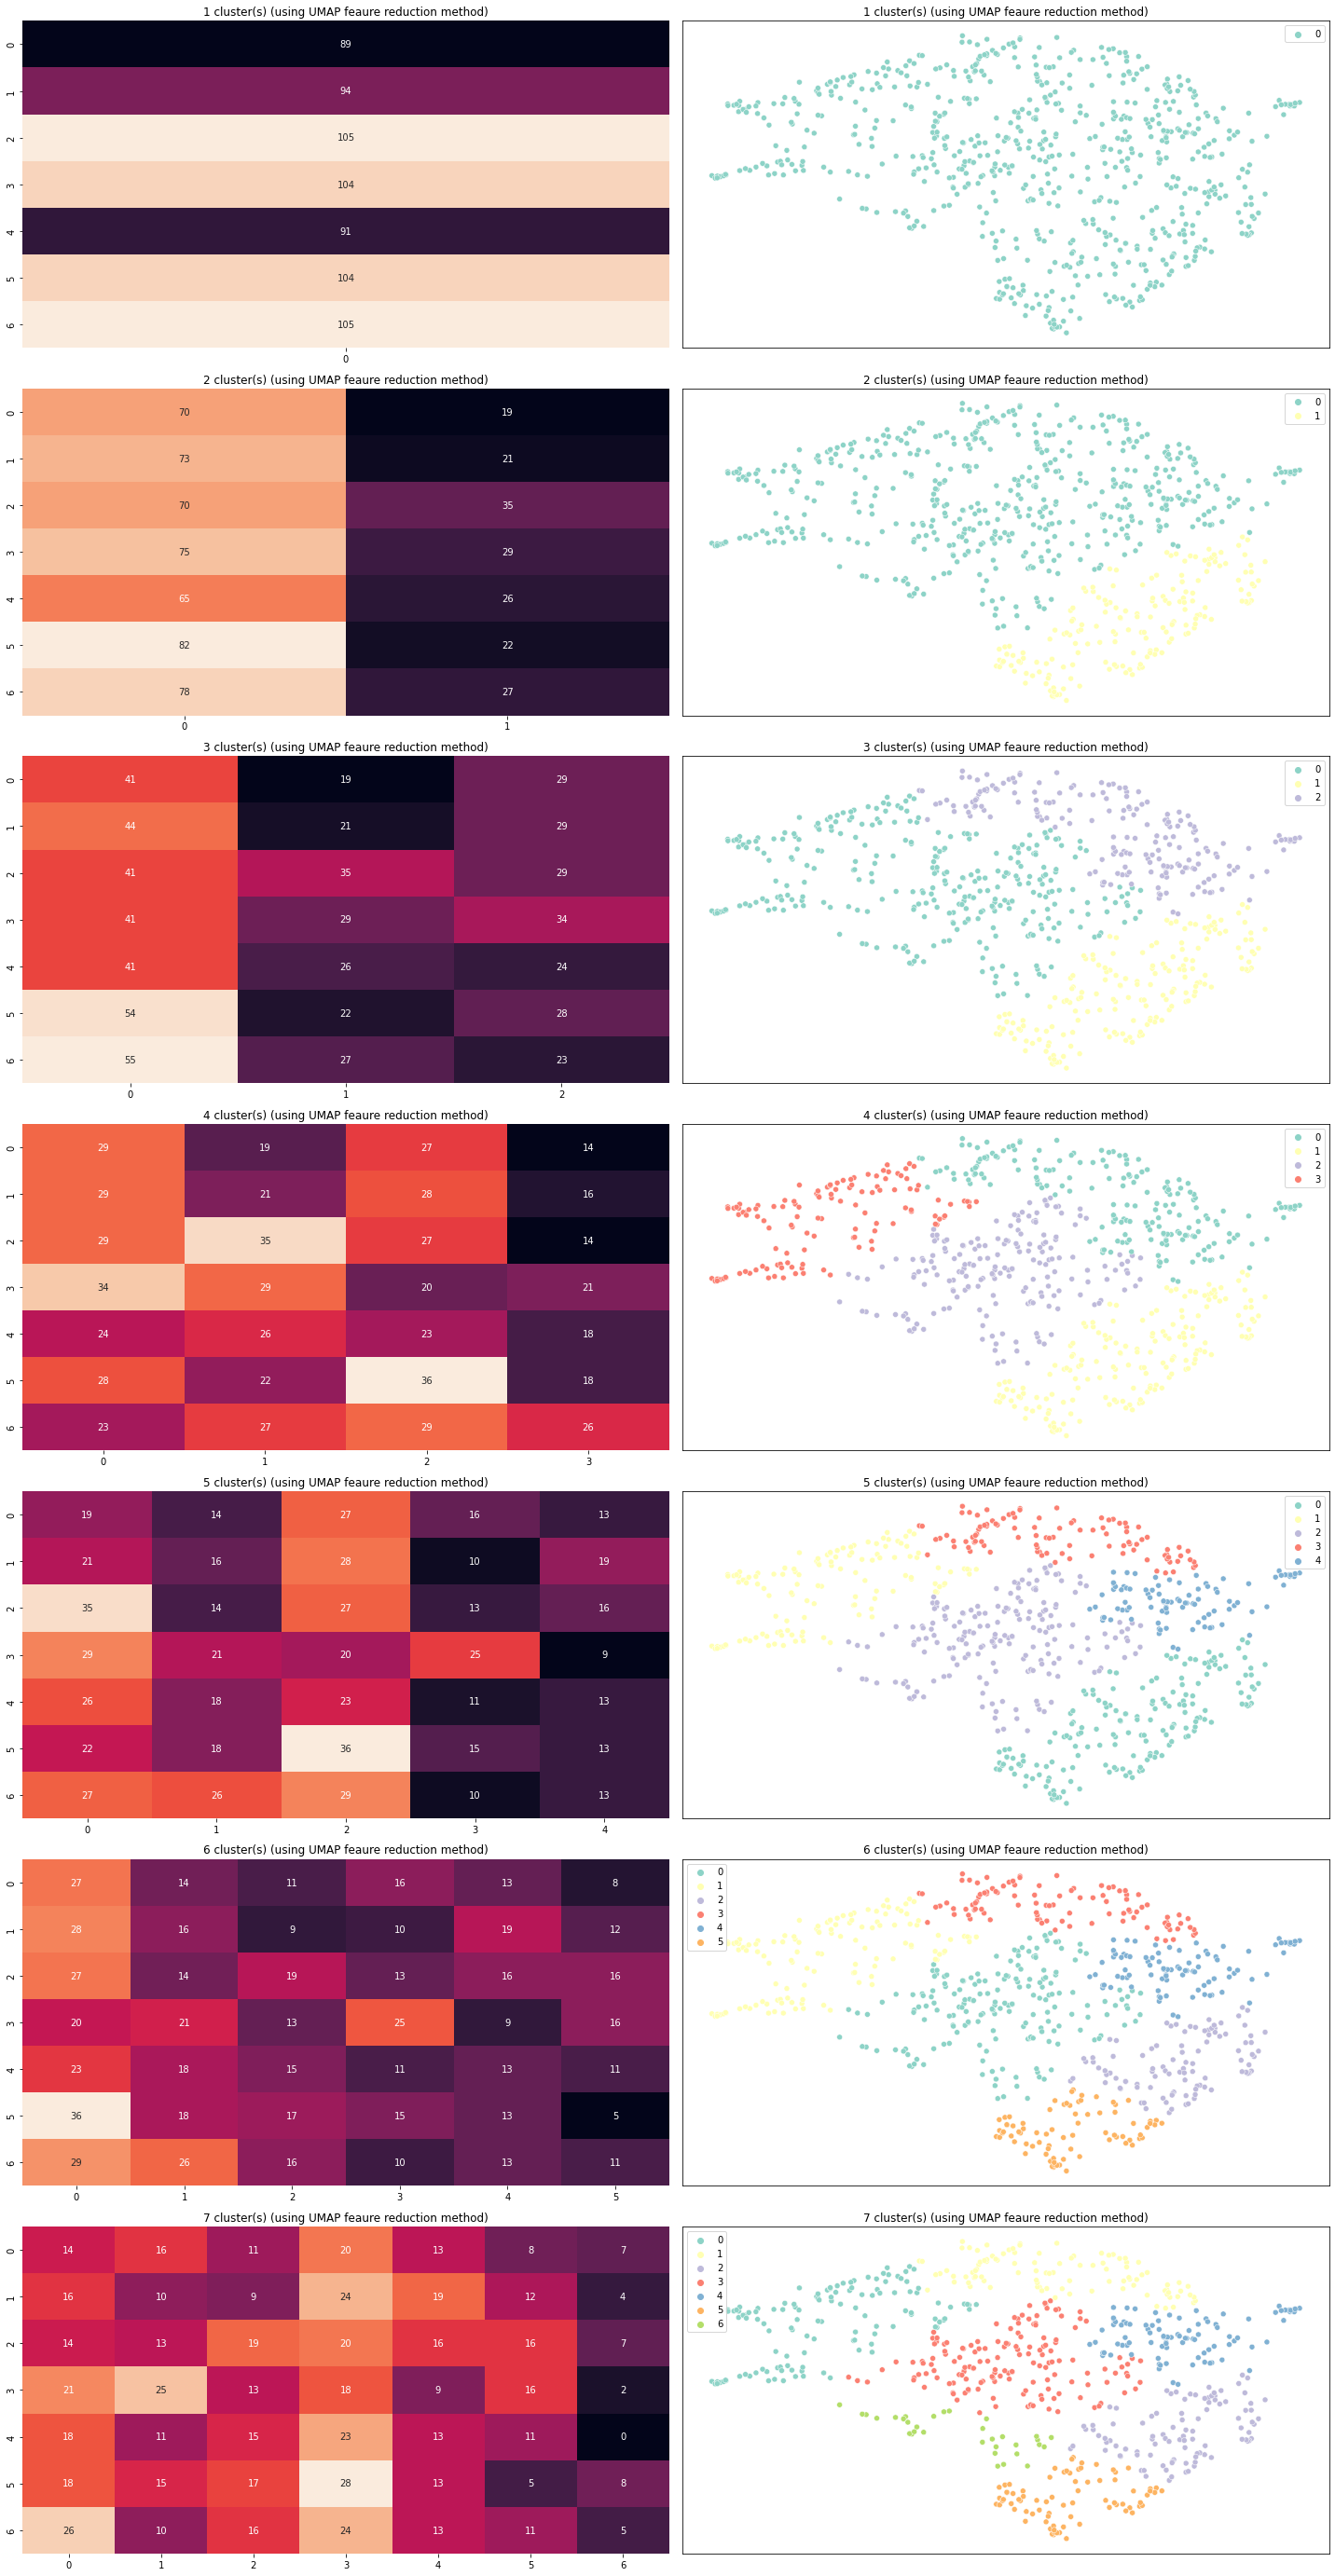

In [11]:
Birch.plotClusters(nClusters=7, fReduction=True)

<span style="color:DodgerBlue">
<font size="4">plot clusters using the given array with original data </font>
</span> 


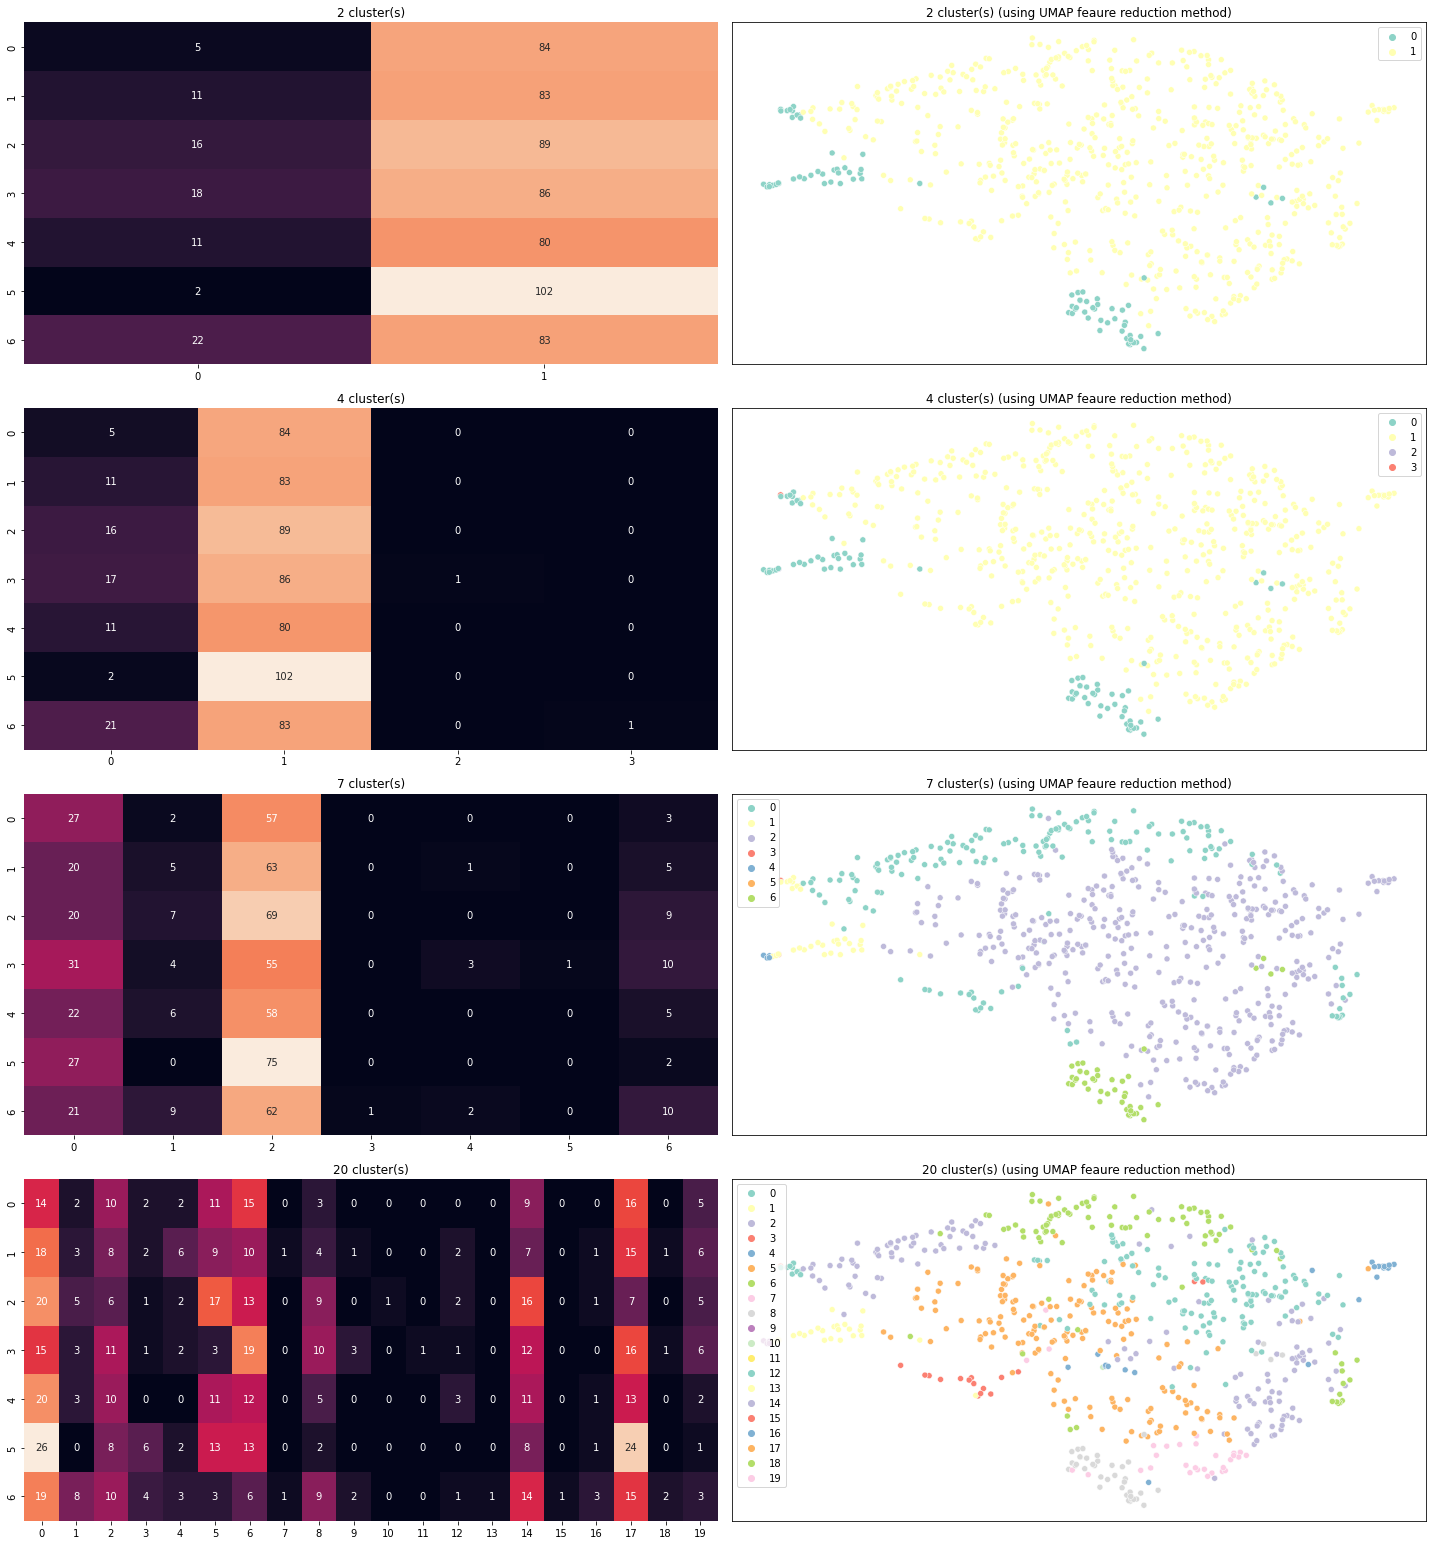

In [12]:
Clusters = [2, 4, 7, 20]
Birch.plotClustersUsingArr(arr=clusters, fReduction=False)

<span style="color:DodgerBlue">
<font size="4">plot clusters using the given array with reduced data </font>
</span> 


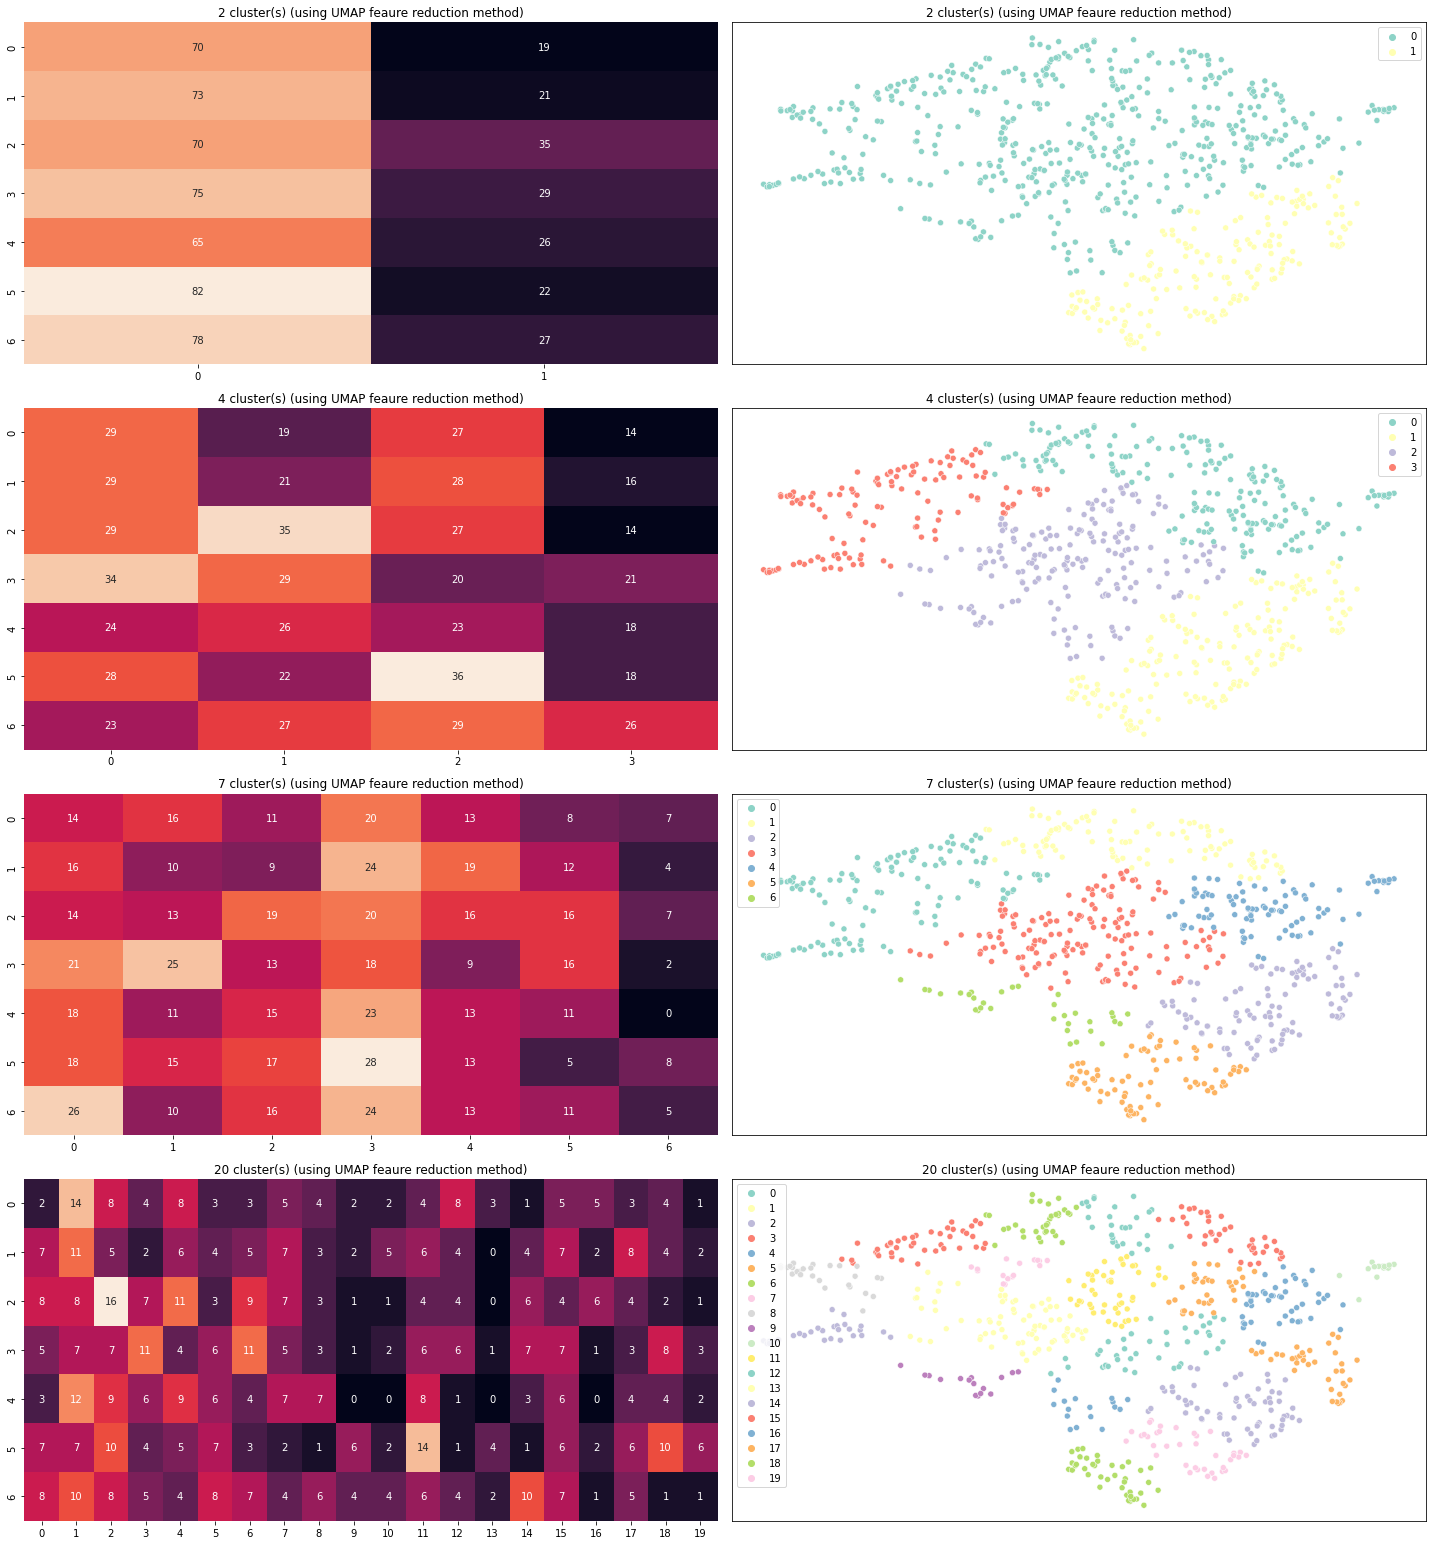

In [13]:
Clusters = [2, 4, 7, 20]
Birch.plotClustersUsingArr(arr=clusters, fReduction=True)

<span style="color:orchid">
<font size="5">BIRCH Clustering with chroma_cqt and melspectrogram</font>
</span> 


<span style="color:DodgerBlue">
<font size="4">Reading from files</font>
</span> 

In [14]:
dataset='591'
df=loaddata(
    features=["chroma_cqt","melspectrogram"], 
            adr1=f'../Datas/X_{dataset}.pickle',
            adr2=f'../Datas/label_instrument_{dataset}.pickle',
            adr3=f'../Datas/label_dastgah_{dataset}.pickle')
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
feature_vectors=df.drop(["dastgah", "instrument"],axis=1)
labels=df["dastgah"]


labelencoder = LabelEncoder()
labelencoder.fit(labels)
y = labelencoder.transform(labels)

scaler = preprocessing.StandardScaler()
feature_vectors = scaler.fit_transform(feature_vectors)

In [15]:
from PCA import *
Pca=pca(feature_vectors)
feature_vectors=Pca.PCAout(10)

<span style="color:DodgerBlue">
<font size="4">Creating object</font>
</span> 


In [16]:
from Birch_model import *
Birch = Birch_Clustering(feature_vectors,y)

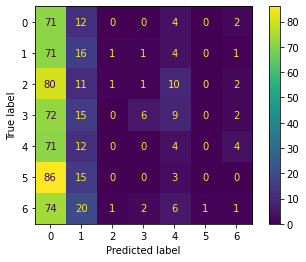

In [17]:
Birch.printConfusionMatrix()

<span style="color:DodgerBlue">
<font size="4">Elbow method to reach optimal K</font>
</span> 

In [18]:
# Birch.elbow(rangeOfClusters=20)

<span style="color:DodgerBlue">
<font size="4">Print metrics results with original data</font>
</span> 


In [19]:
clusters = [2, 4, 7, 20]
Birch.printDataMetrics(arr= clusters, fReduction=False)

Name                 Silhouette Score     chcalinski_harabasz_score davies_bouldin_score
#clusters=2          0.7703               172.8512             0.7521              
----------------------------------------------------------------------------------------------------
#clusters=4          0.3449               147.6304             1.3337              
----------------------------------------------------------------------------------------------------
#clusters=7          0.2854               143.37               1.0905              
----------------------------------------------------------------------------------------------------
#clusters=20         0.1852               112.2518             0.9999              
----------------------------------------------------------------------------------------------------




Name                 adjusted_rand_score  adjusted_mutual_info_score     normalized_mutual_info_score   homogeneity_score    completeness_score   v_measure_score      

<span style="color:DodgerBlue">
<font size="4">Print metrics results with reduced data</font>
</span> 


In [20]:
clusters = [2, 4, 7, 20]
Birch.printDataMetrics(arr= clusters, fReduction=True)

Name                 Silhouette Score     chcalinski_harabasz_score davies_bouldin_score
#clusters=2          0.38440001010894775  432.3414             0.9067              
----------------------------------------------------------------------------------------------------
#clusters=4          0.4165000021457672   762.9723             0.8614              
----------------------------------------------------------------------------------------------------
#clusters=7          0.39489999413490295  787.6837             0.8041              
----------------------------------------------------------------------------------------------------
#clusters=20         0.4153999984264374   921.3269             0.7468              
----------------------------------------------------------------------------------------------------




Name                 adjusted_rand_score  adjusted_mutual_info_score     normalized_mutual_info_score   homogeneity_score    completeness_score   v_measure_score      

<span style="color:DodgerBlue">
<font size="4">plot clusters from 1 to nClusters with original data </font>
</span> 


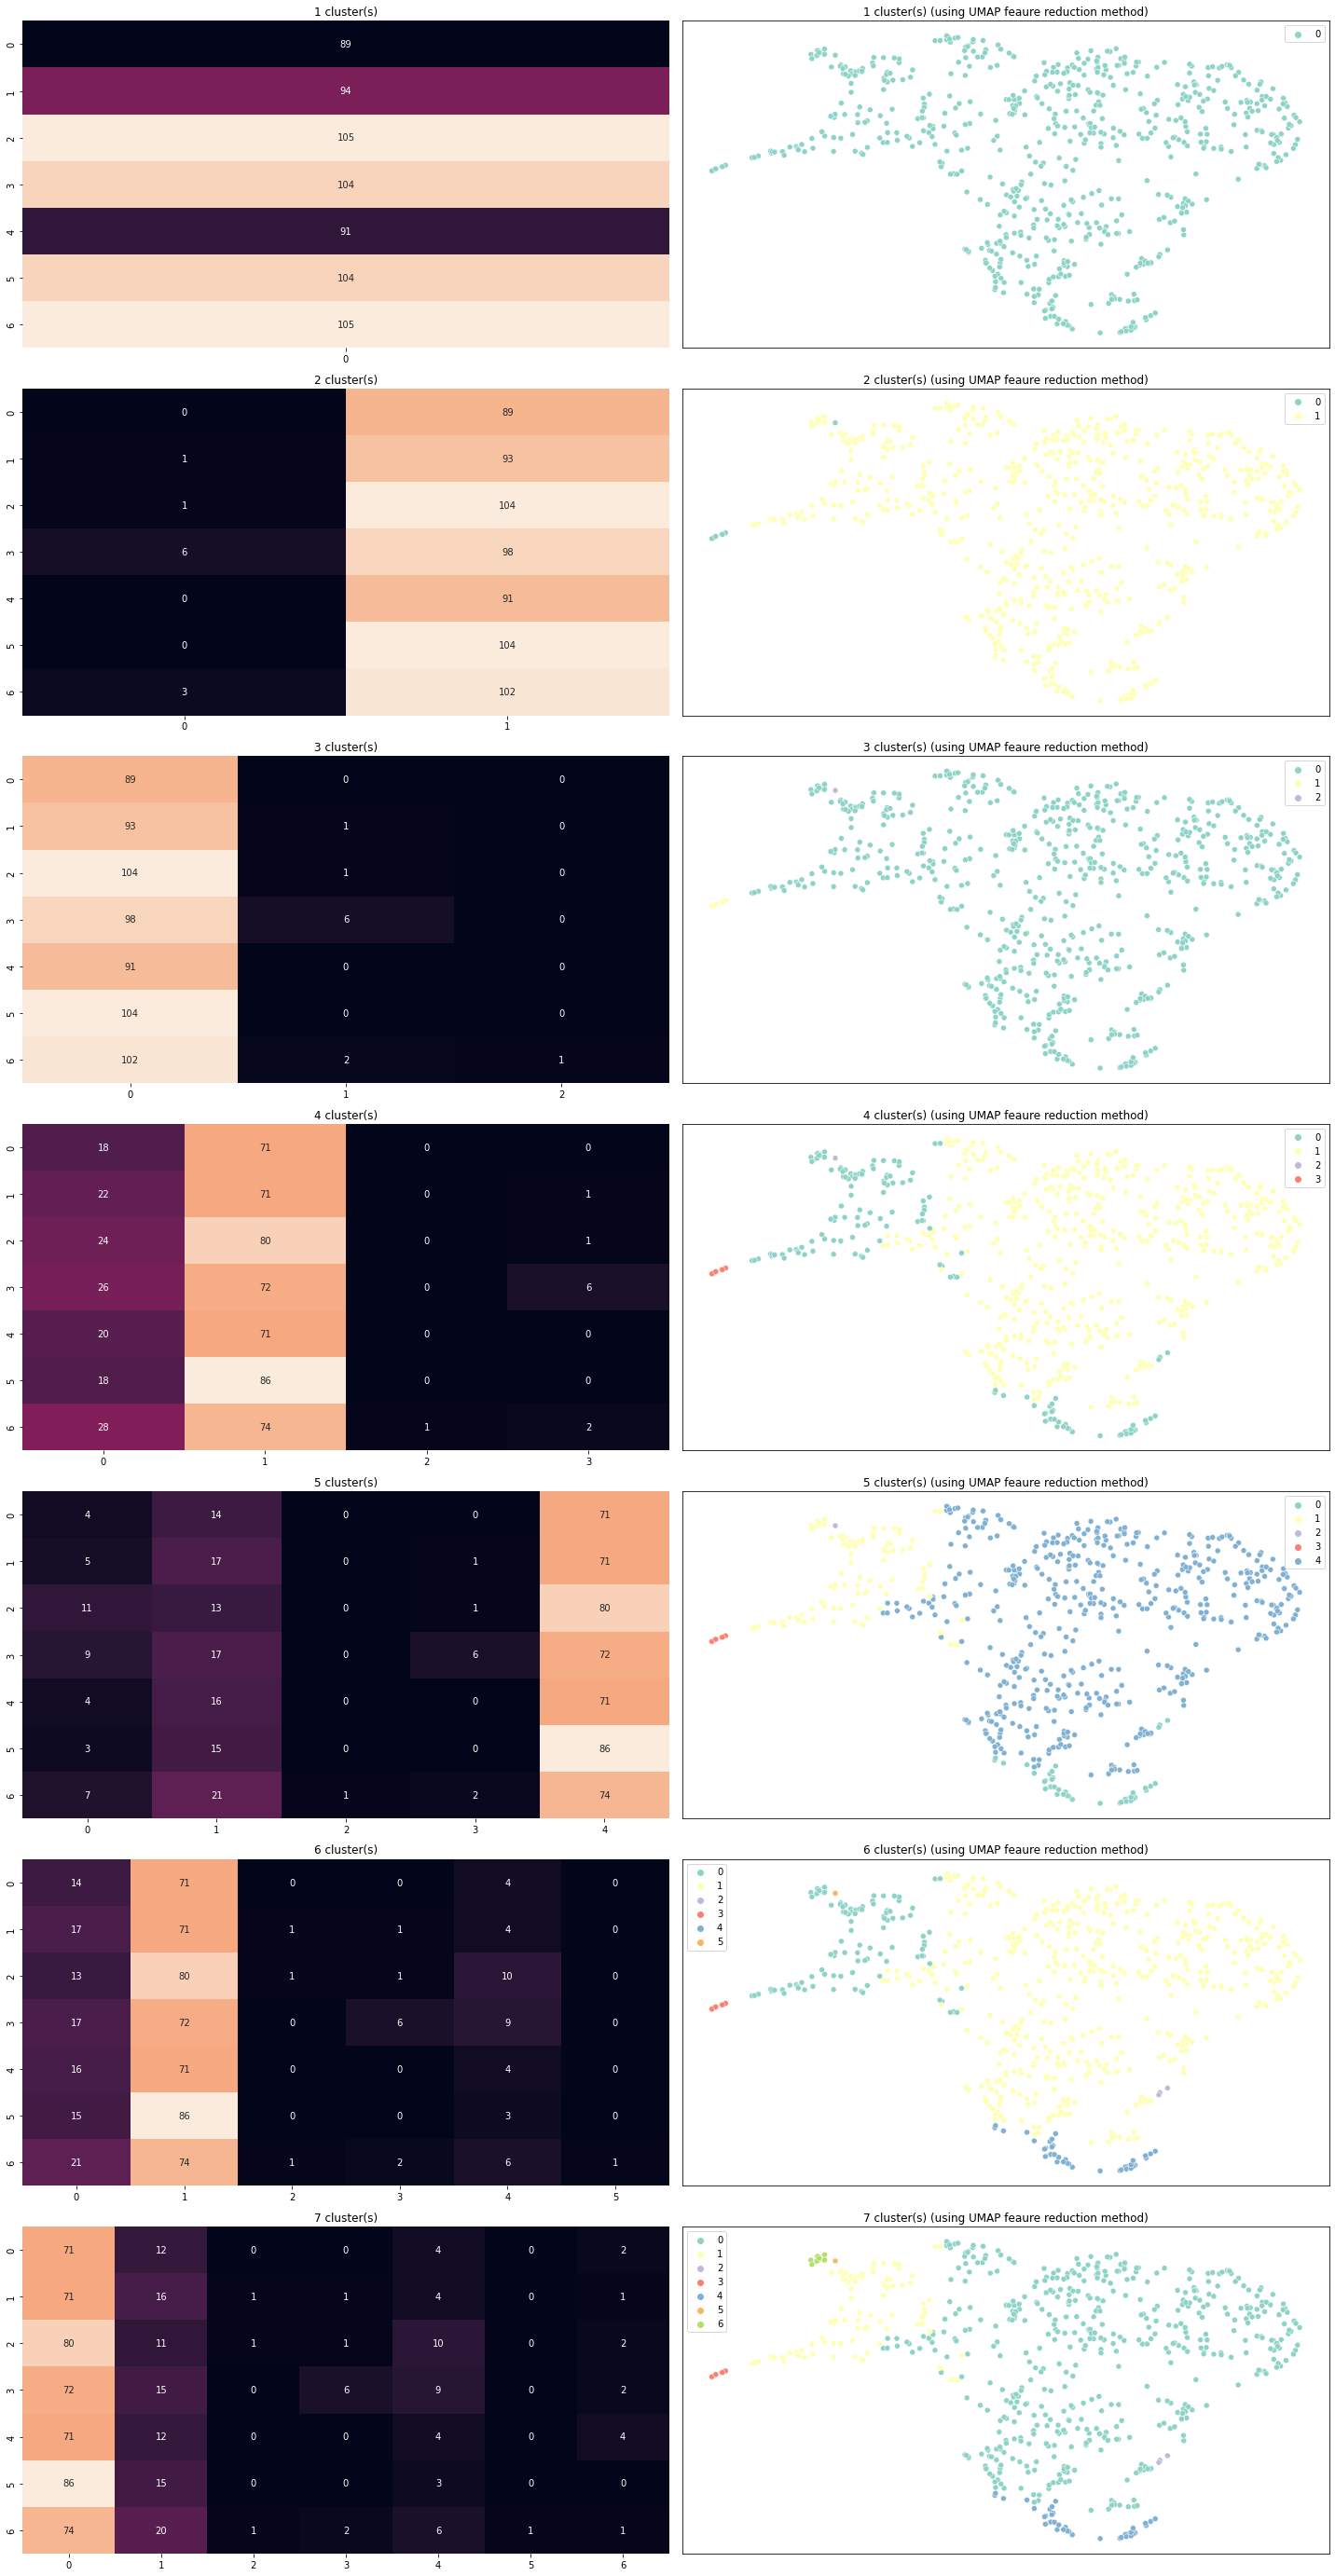

In [21]:
Birch.plotClusters(nClusters=7, fReduction=False)

<span style="color:DodgerBlue">
<font size="4">plot clusters from 1 to nClusters with reduced data </font>
</span> 


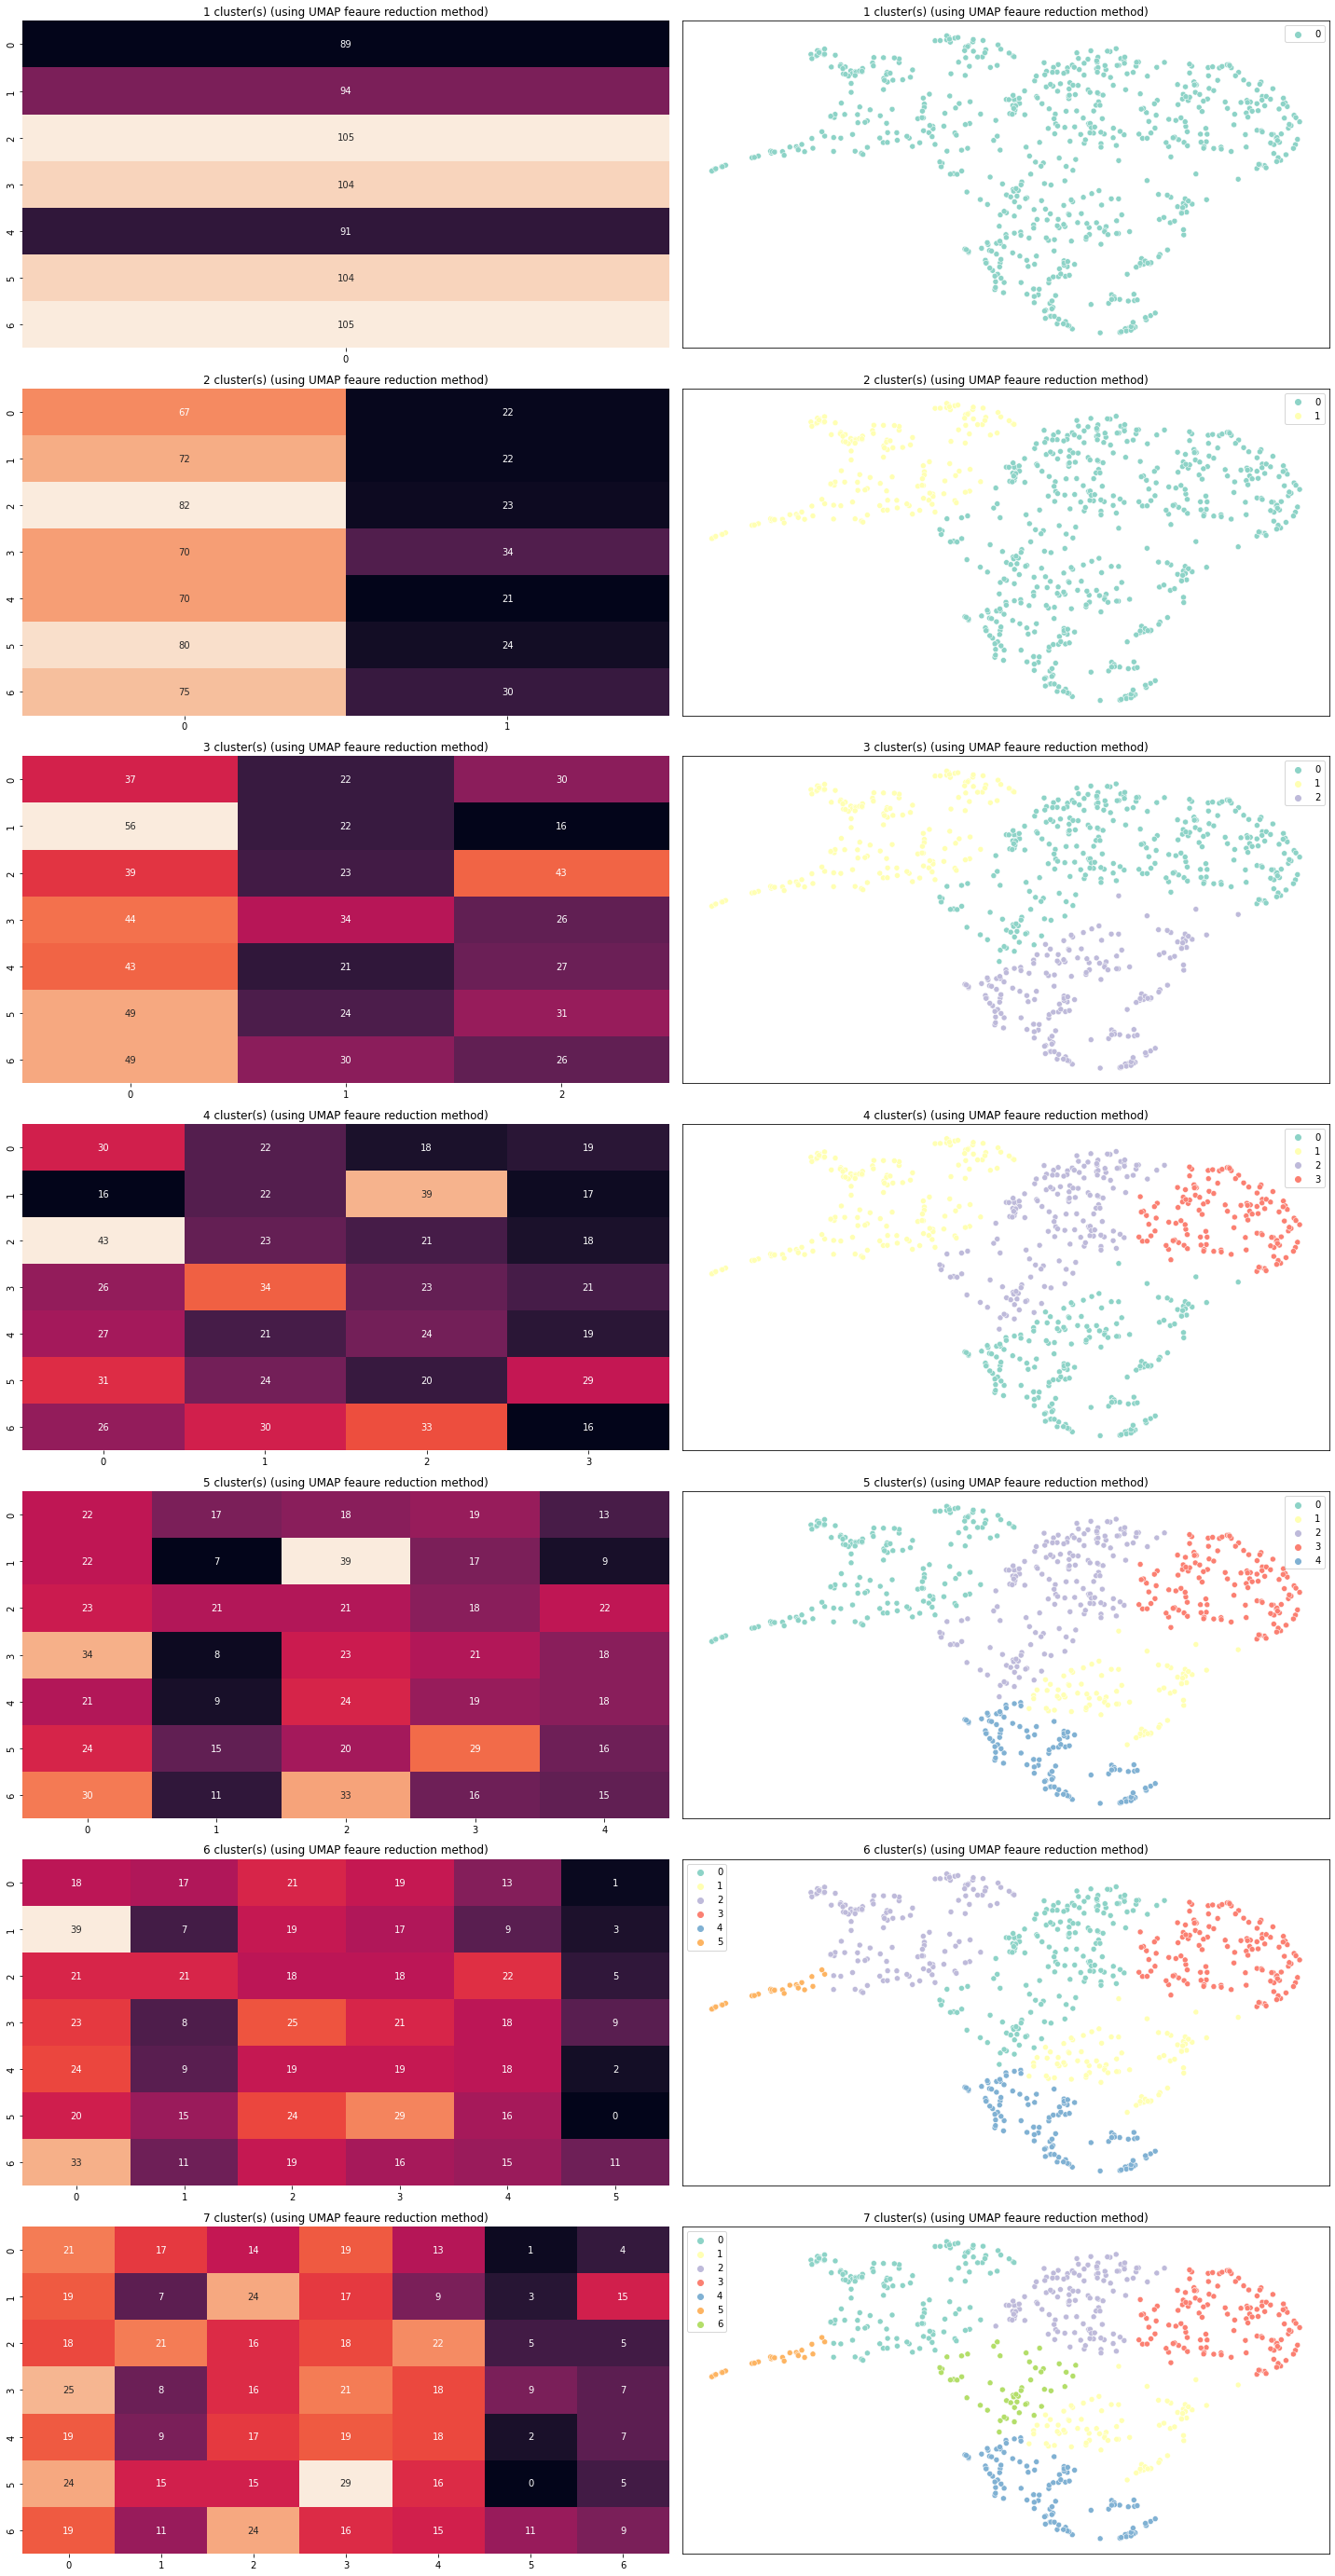

In [22]:
Birch.plotClusters(nClusters=7, fReduction=True)

<span style="color:DodgerBlue">
<font size="4">plot clusters using the given array with original data </font>
</span> 


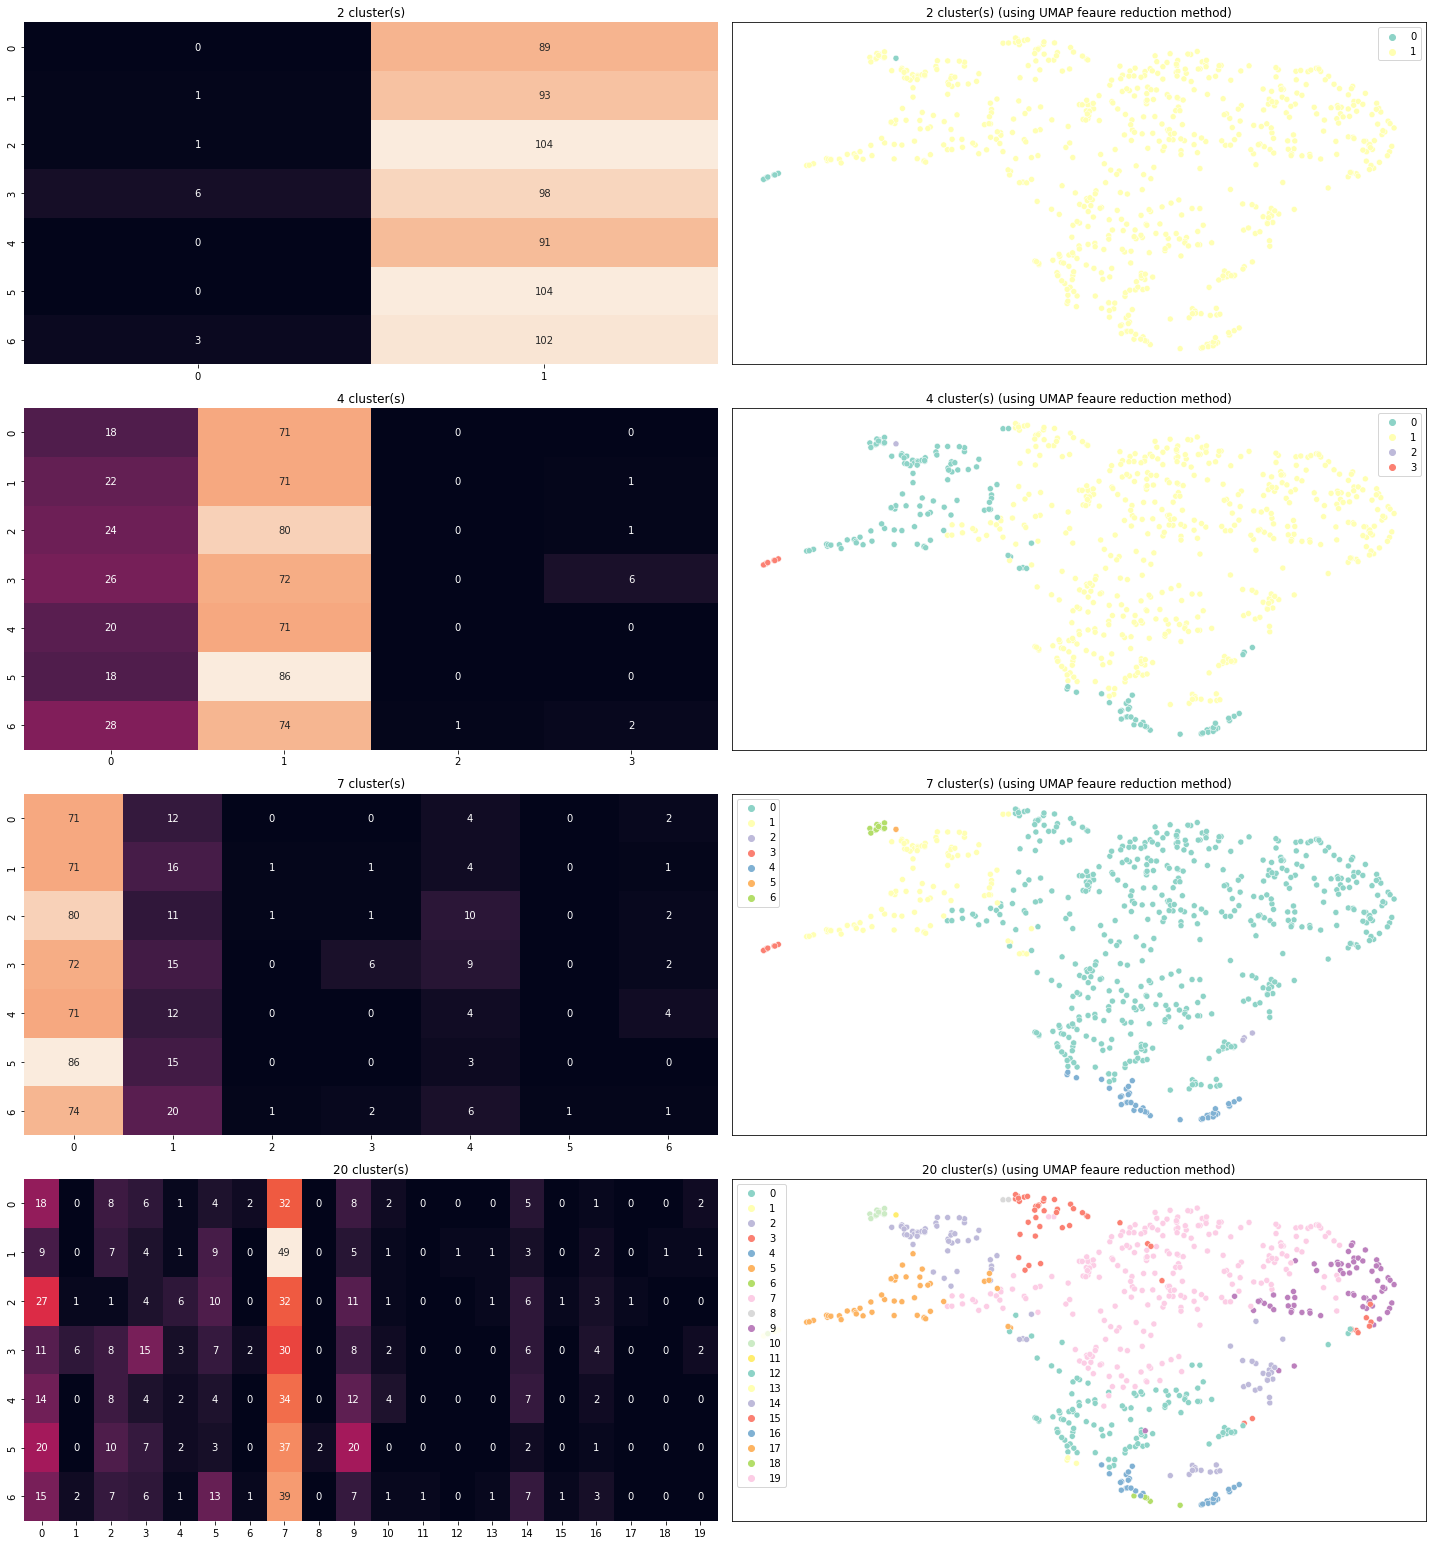

In [23]:
Clusters = [2, 4, 7, 20]
Birch.plotClustersUsingArr(arr=clusters, fReduction=False)

<span style="color:DodgerBlue">
<font size="4">plot clusters using the given array with reduced data </font>
</span> 


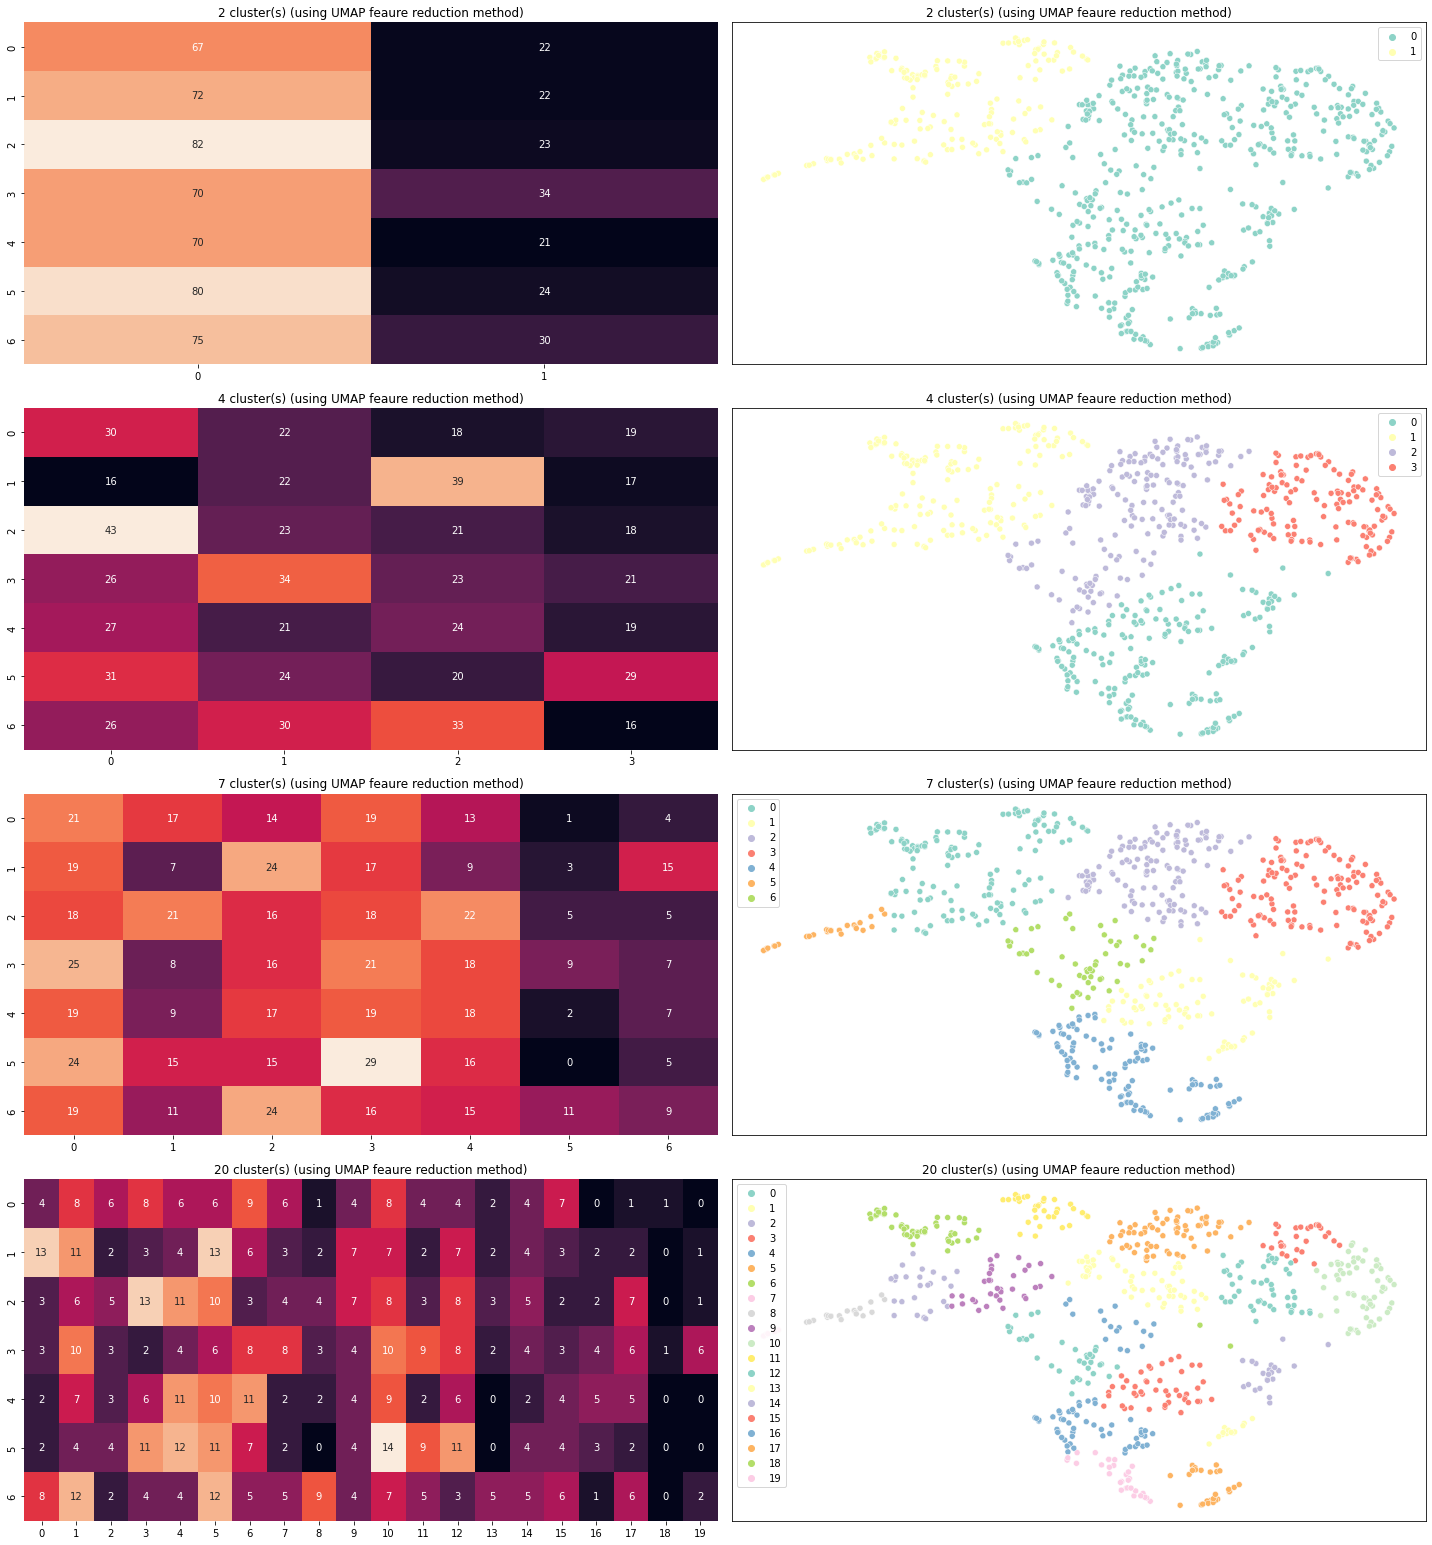

In [24]:
Clusters = [2, 4, 7, 20]
Birch.plotClustersUsingArr(arr=clusters, fReduction=True)

<span style="color:orchid">
<font size="5">BIRCH Clustering with fourier_tempogram</font>
</span> 


<span style="color:DodgerBlue">
<font size="4">Reading from files</font>
</span> 

In [25]:
dataset='591'
df=loaddata(features=["fourier_tempogram"], 
            adr1=f'../Datas/X_{dataset}.pickle',
            adr2=f'../Datas/label_instrument_{dataset}.pickle',
            adr3=f'../Datas/label_dastgah_{dataset}.pickle')
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
feature_vectors=df.drop(["dastgah", "instrument"],axis=1)
labels=df["dastgah"]


labelencoder = LabelEncoder()
labelencoder.fit(labels)
y = labelencoder.transform(labels)

scaler = preprocessing.StandardScaler()
feature_vectors = scaler.fit_transform(feature_vectors)

In [26]:
from PCA import *
Pca=pca(feature_vectors)
feature_vectors=Pca.PCAout(10)

<span style="color:DodgerBlue">
<font size="4">Creating object</font>
</span> 


In [27]:
from Birch_model import *
Birch = Birch_Clustering(feature_vectors,y)

<span style="color:DodgerBlue">
<font size="4">Confusion Matrix</font>
</span> 

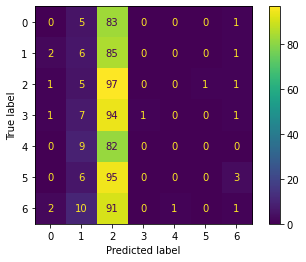

In [28]:
Birch.printConfusionMatrix()

<span style="color:DodgerBlue">
<font size="4">Elbow method to reach optimal K</font>
</span> 

In [29]:
# Birch.elbow(rangeOfClusters=20)

<span style="color:DodgerBlue">
<font size="4">Print metrics results with original data</font>
</span> 


In [30]:
clusters = [2, 4, 7, 20]
Birch.printDataMetrics(arr= clusters, fReduction=False)

Name                 Silhouette Score     chcalinski_harabasz_score davies_bouldin_score
#clusters=2          0.8545               62.6133              0.0957              
----------------------------------------------------------------------------------------------------
#clusters=4          0.647                51.2748              1.218               
----------------------------------------------------------------------------------------------------
#clusters=7          0.3678               49.3348              1.1914              
----------------------------------------------------------------------------------------------------
#clusters=20         0.0806               44.8563              1.258               
----------------------------------------------------------------------------------------------------




Name                 adjusted_rand_score  adjusted_mutual_info_score     normalized_mutual_info_score   homogeneity_score    completeness_score   v_measure_score      

<span style="color:DodgerBlue">
<font size="4">Print metrics results with reduced data</font>
</span> 


In [31]:
clusters = [2, 4, 7, 20]
Birch.printDataMetrics(arr= clusters, fReduction=True)

Name                 Silhouette Score     chcalinski_harabasz_score davies_bouldin_score
#clusters=2          0.3264999985694885   395.1002             1.1596              
----------------------------------------------------------------------------------------------------
#clusters=4          0.32339999079704285  430.5003             0.8868              
----------------------------------------------------------------------------------------------------
#clusters=7          0.2973000109195709   503.4066             0.9182              
----------------------------------------------------------------------------------------------------
#clusters=20         0.3596999943256378   666.4925             0.8032              
----------------------------------------------------------------------------------------------------




Name                 adjusted_rand_score  adjusted_mutual_info_score     normalized_mutual_info_score   homogeneity_score    completeness_score   v_measure_score      

<span style="color:DodgerBlue">
<font size="4">plot clusters from 1 to nClusters with original data </font>
</span> 


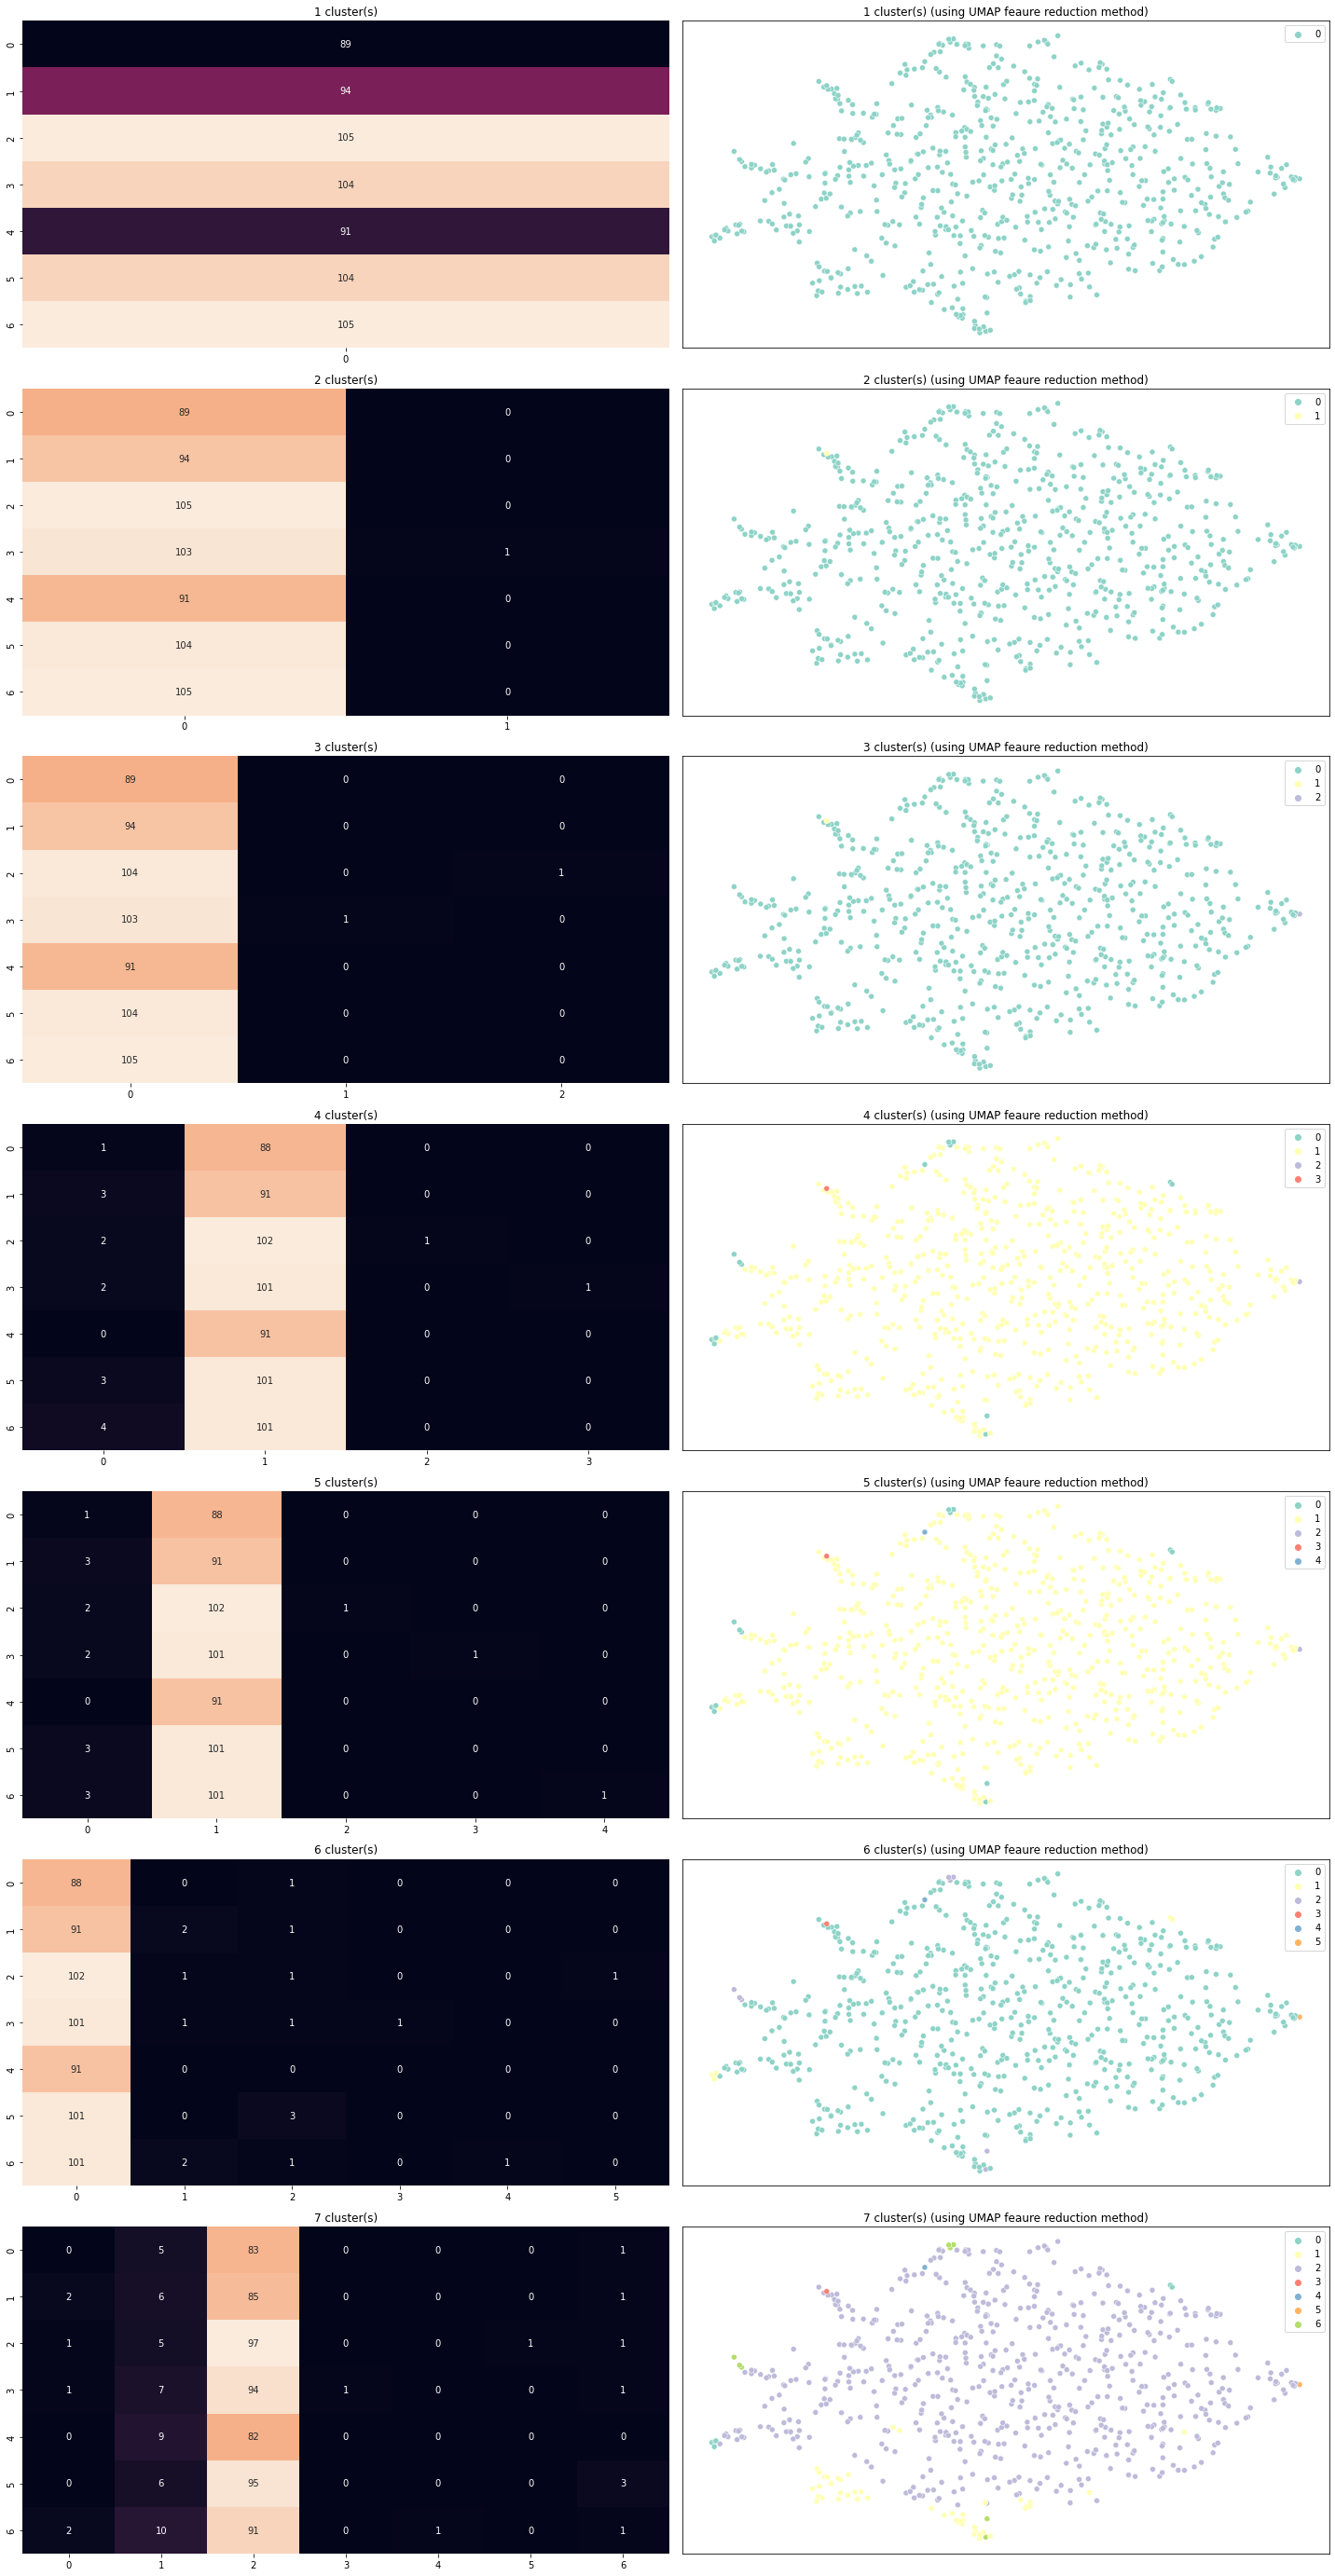

In [32]:
Birch.plotClusters(nClusters=7, fReduction=False)

<span style="color:DodgerBlue">
<font size="4">plot clusters from 1 to nClusters with reduced data </font>
</span> 


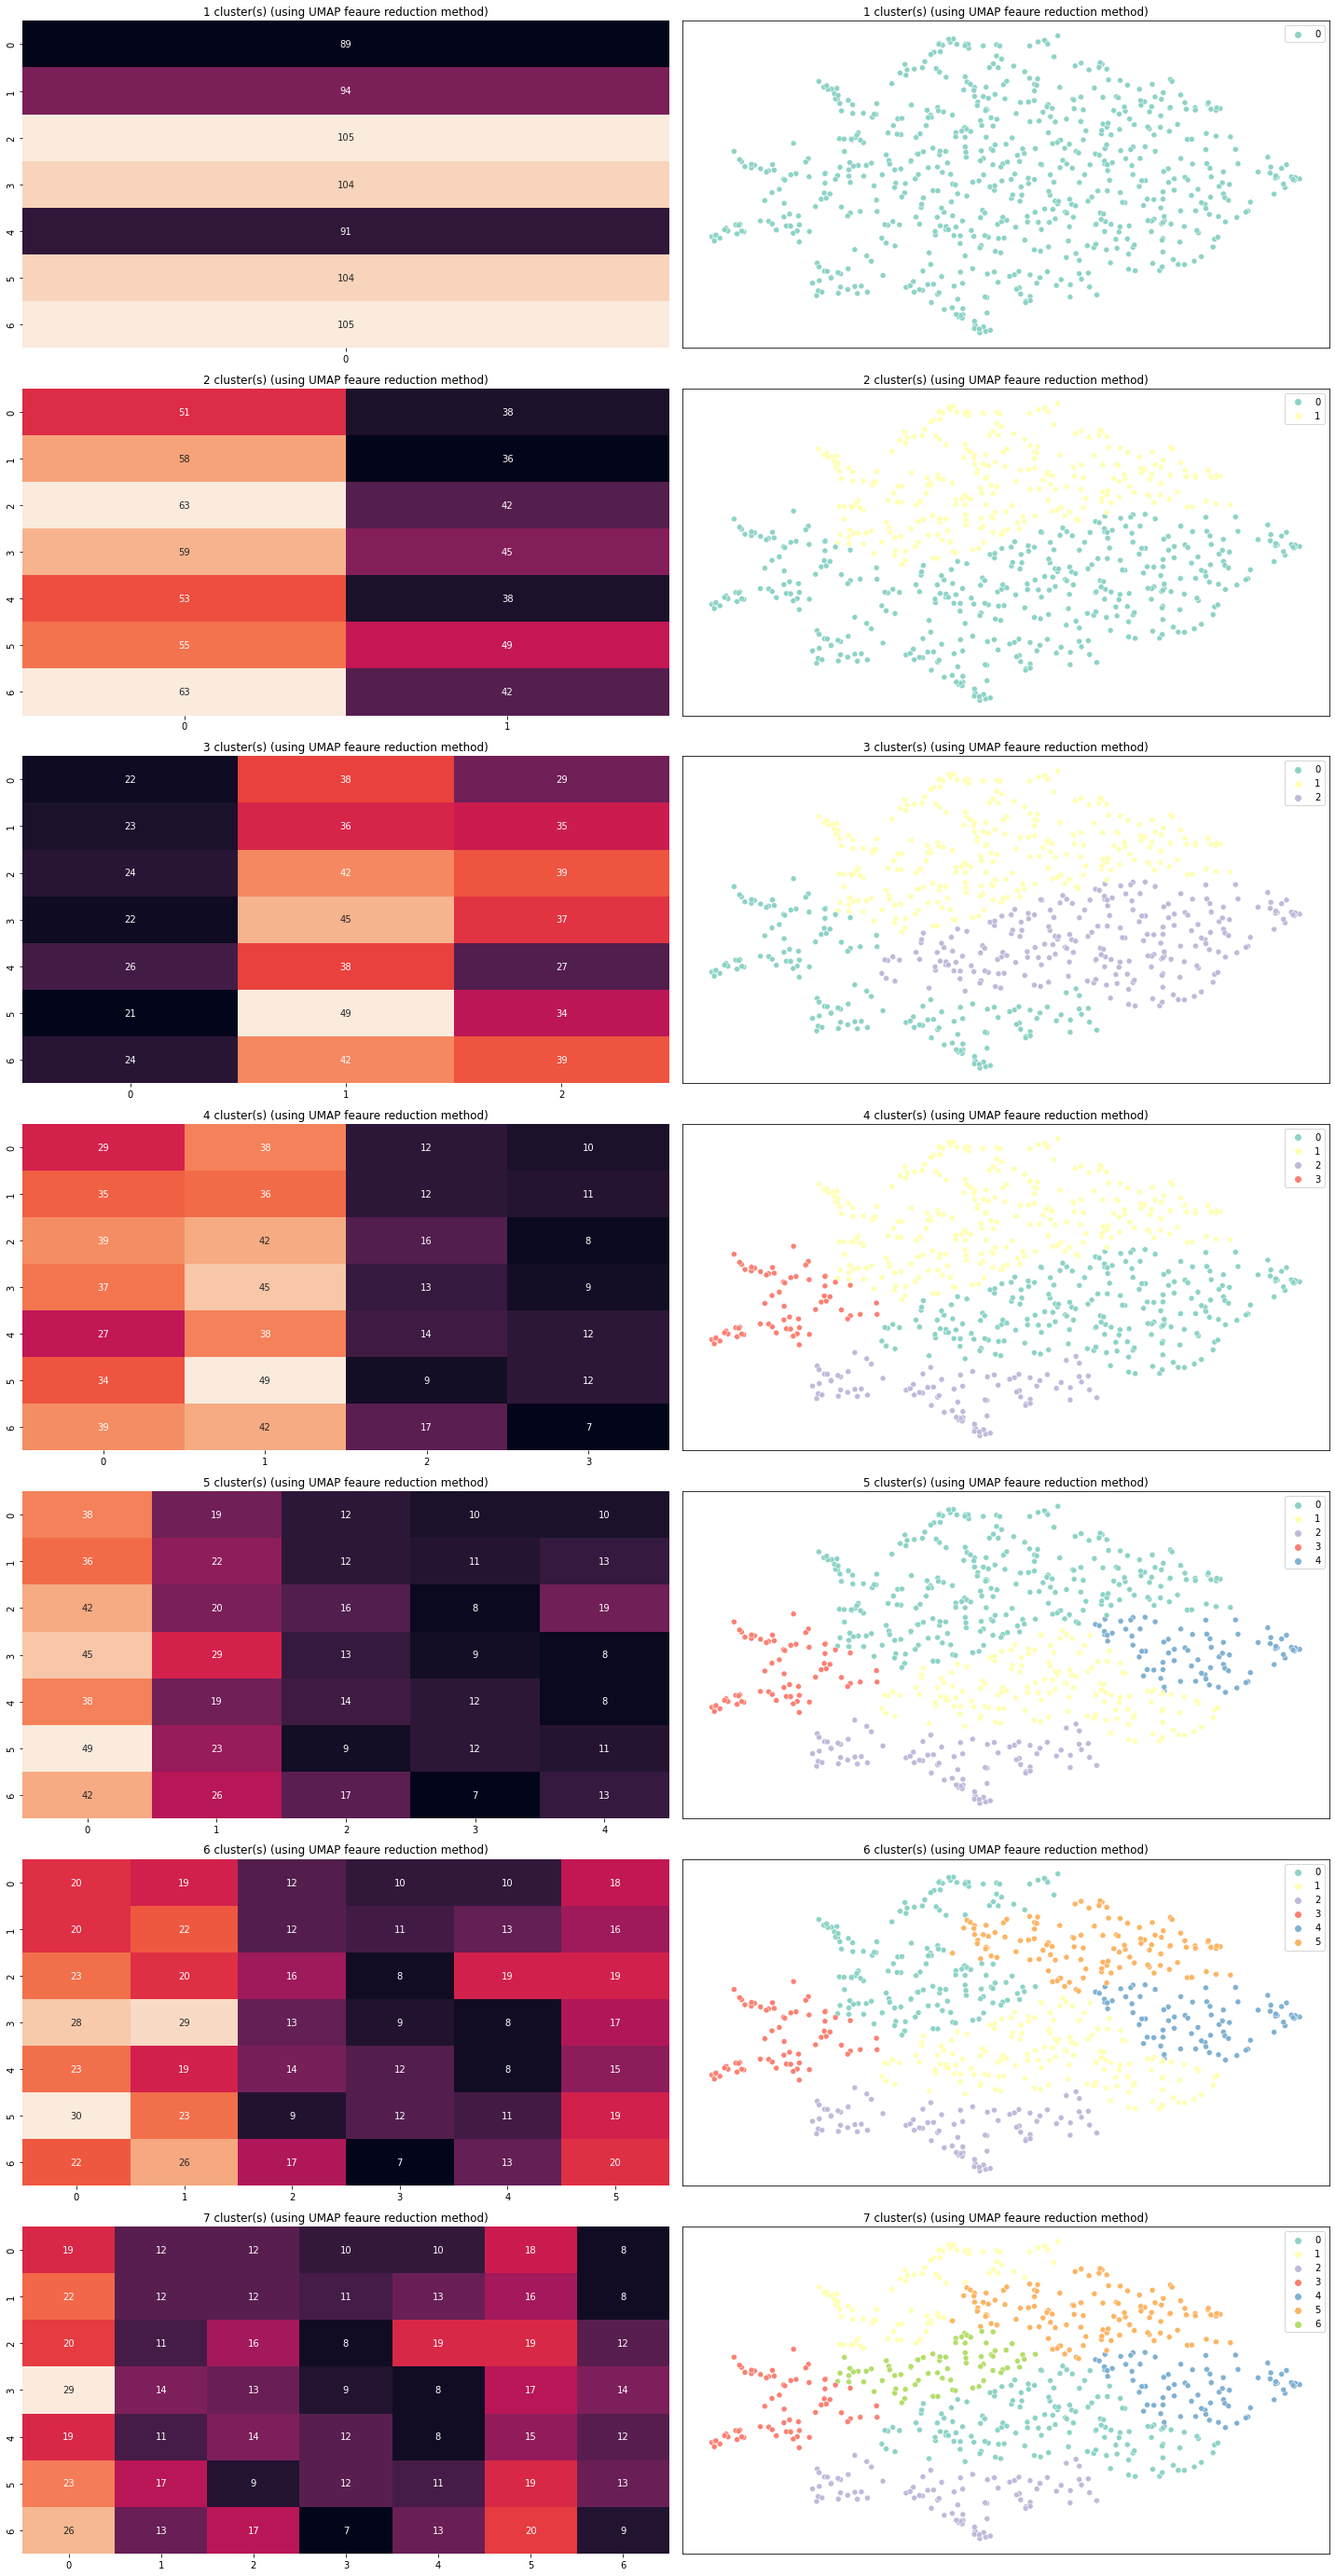

In [33]:
Birch.plotClusters(nClusters=7, fReduction=True)

<span style="color:DodgerBlue">
<font size="4">plot clusters using the given array with original data </font>
</span> 


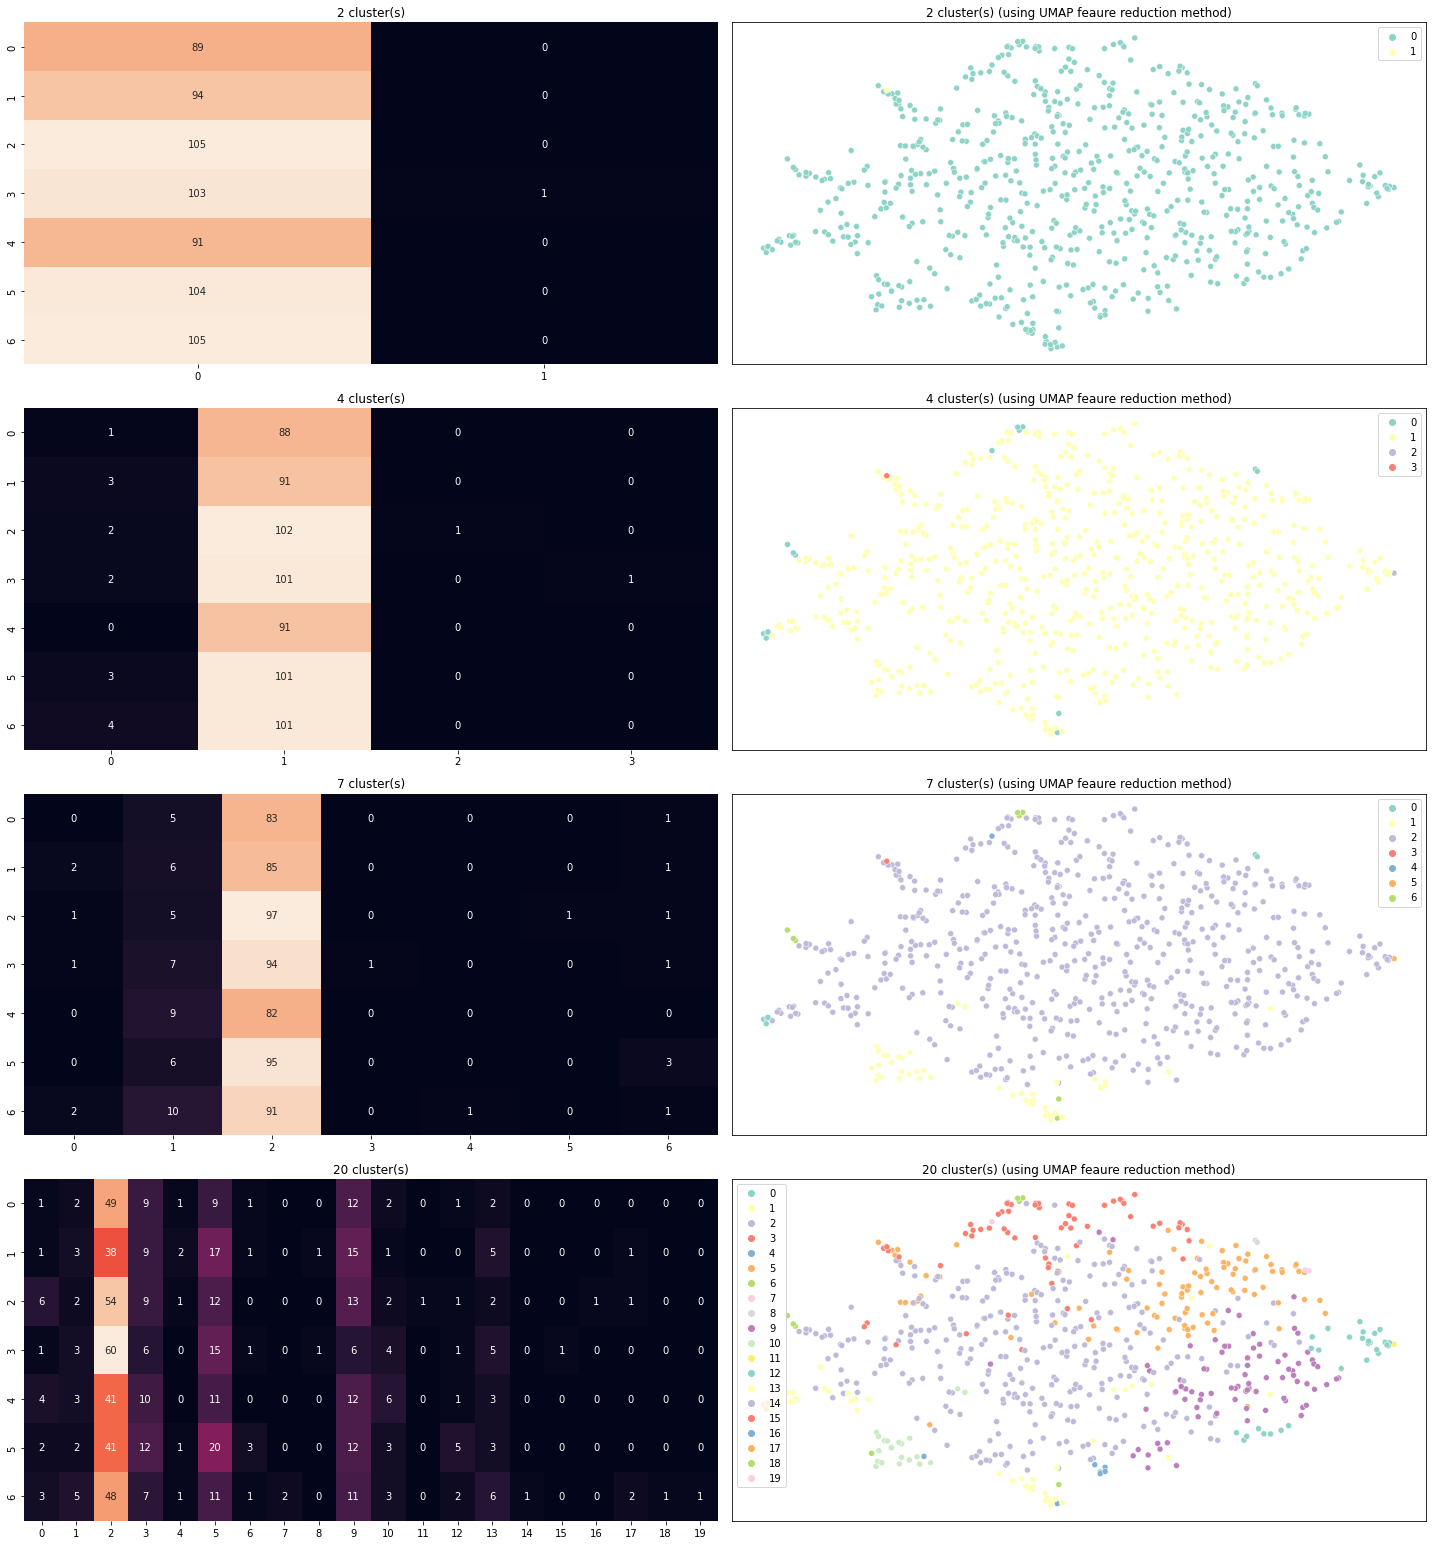

In [34]:
Clusters = [2, 4, 7, 20]
Birch.plotClustersUsingArr(arr=clusters, fReduction=False)

<span style="color:DodgerBlue">
<font size="4">plot clusters using the given array with reduced data </font>
</span> 


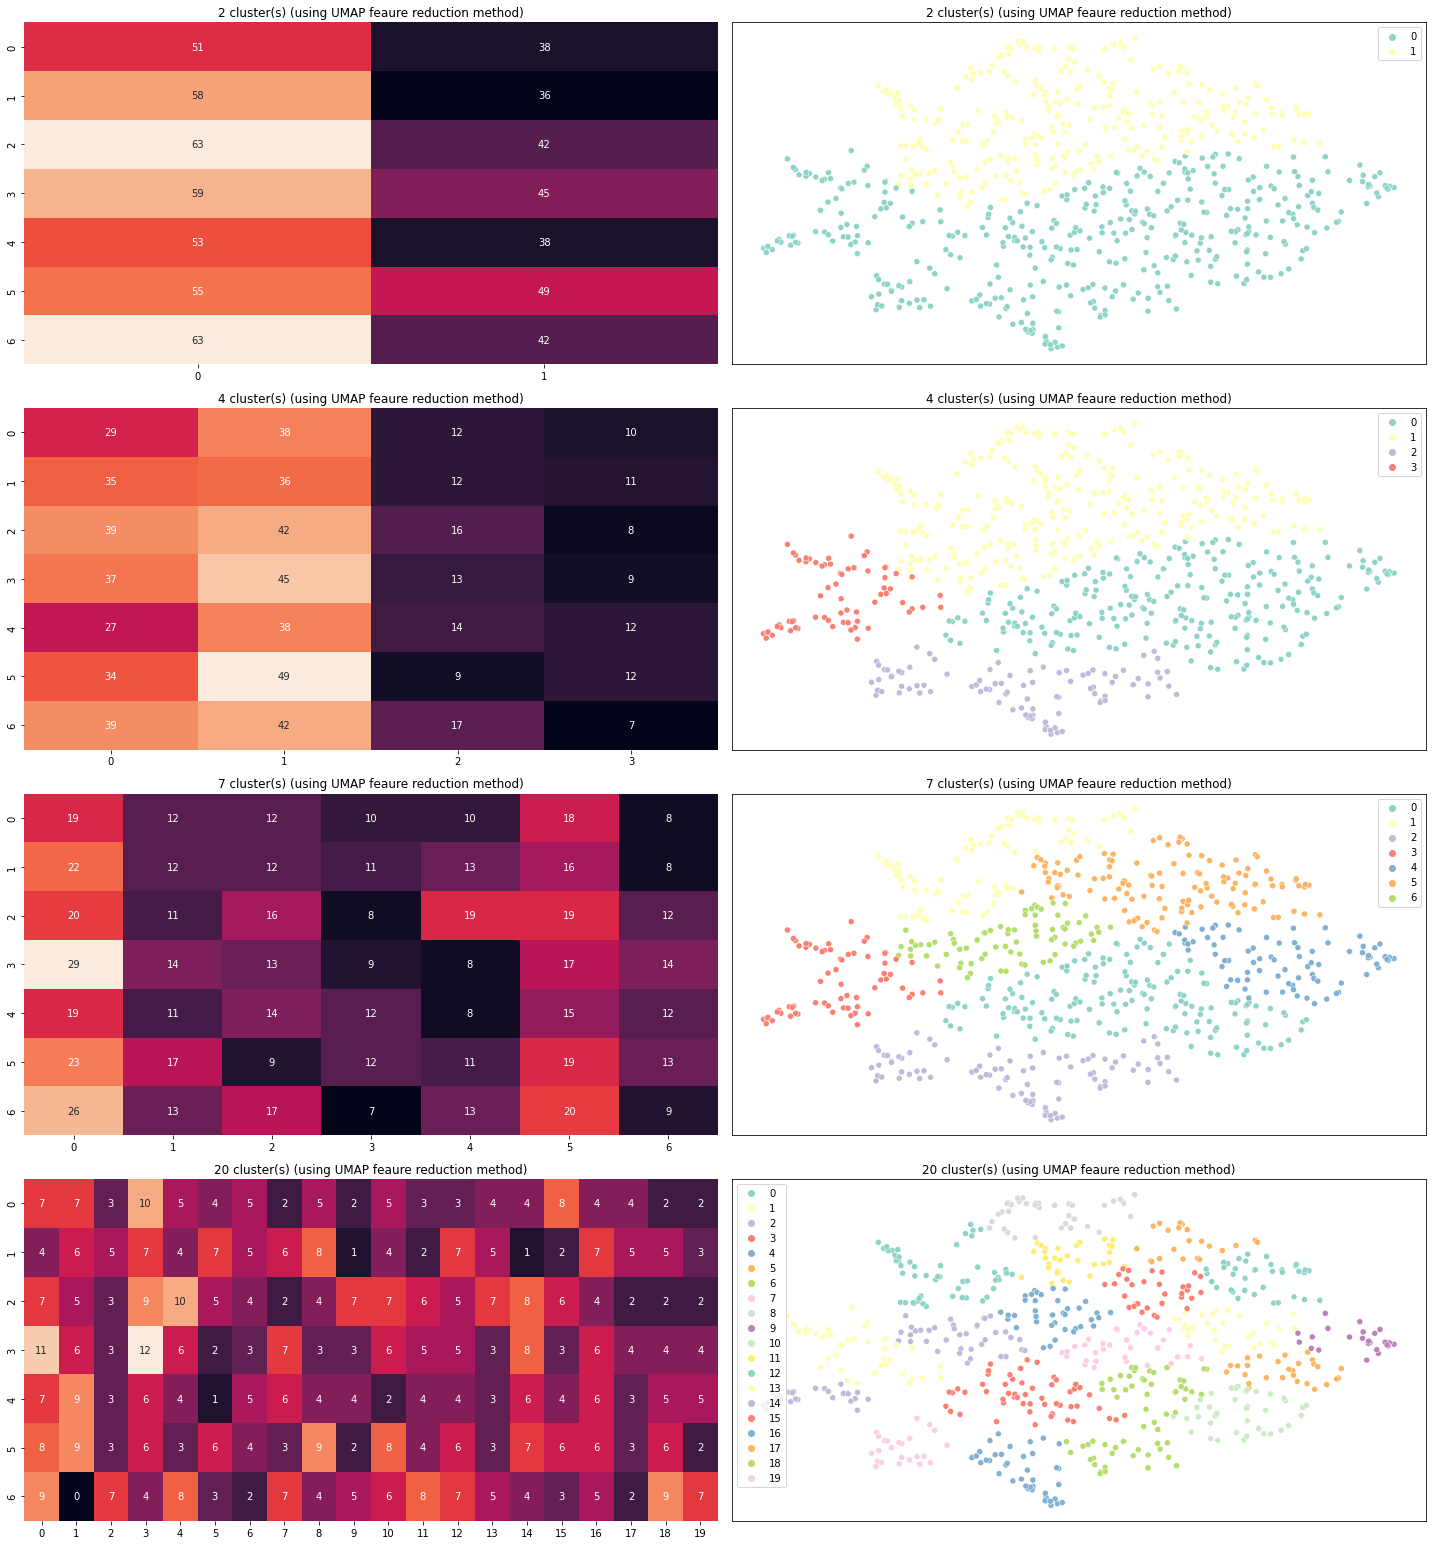

In [35]:
Clusters = [2, 4, 7, 20]
Birch.plotClustersUsingArr(arr=clusters, fReduction=True)